In [1]:
print("Nama: Rahman Aziz Firmansyah")

Nama: Rahman Aziz Firmansyah


In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
import itertools
from datetime import datetime, timedelta

In [3]:
df_train = pd.read_csv('model_development_set.csv')
df_train.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,...,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english,label
0,8b9f55ee19f0356ba6b3f03485e6922d,bc7b9e0d078c0c01f622b38cfcd7ee9c,20521.0,rio de janeiro,RJ,20521.0,-22.927008,-43.230270,rio de janeiro,RJ,...,1.0,850.0,16.0,19.0,15.0,71070.0,brasilia,DF,furniture_decor,0
1,5dddbfbf5ba7c90dcb52c18d7835b756,2004ba7732339d9be65f2236d8887ae4,22450.0,rio de janeiro,RJ,22450.0,-22.987642,-43.228795,rio de janeiro,RJ,...,3.0,584.0,16.0,11.0,13.0,14050.0,ribeirao preto,SP,watches_gifts,1
2,c7f26440b498a90f758f26eda34f1801,e64711458e5538f51bc01c3388443450,20040.0,rio de janeiro,RJ,20040.0,-22.903826,-43.177436,rio de janeiro,RJ,...,1.0,1050.0,36.0,24.0,22.0,3426.0,sao paulo,SP,cool_stuff,1
3,05e86ce92eb1b627c2296627078d237c,480ca1a9f688a4c482177efdeeb5c3a3,21330.0,rio de janeiro,RJ,21330.0,-22.881837,-43.358881,rio de janeiro,RJ,...,2.0,500.0,25.0,9.0,18.0,12250.0,monteiro lobato,SP,food_drink,1
4,552215a43eb8963b5ea631bde3e63bc5,dbc6ce0dfea576d88ea65af28d09b69e,56460.0,petrolandia,PE,56460.0,-8.982786,-38.222378,petrolandia,PE,...,2.0,200.0,20.0,10.0,20.0,12327.0,jacarei,SP,cool_stuff,1


In [4]:
#drop fitur-fitur yang tidak akan digunakan pada pembuatan model
df_train = df_train.drop(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix', 'geolocation_zip_code_prefix',
              'order_id', 'seller_zip_code_prefix', 'seller_id', 'product_id'], axis=1)

In [5]:
df_train.head()

,customer_city,customer_state,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_city,seller_state,product_category_name_english,label
0,rio de janeiro,RJ,-22.927008,-43.230270,rio de janeiro,RJ,delivered,2017-03-20 21:55:02,2017-03-20 21:55:02,2017-03-23 12:22:48,...,922.0,1.0,850.0,16.0,19.0,15.0,brasilia,DF,furniture_decor,0
1,rio de janeiro,RJ,-22.987642,-43.228795,rio de janeiro,RJ,delivered,2018-05-10 11:23:03,2018-05-10 11:51:37,2018-05-16 15:29:00,...,523.0,3.0,584.0,16.0,11.0,13.0,ribeirao preto,SP,watches_gifts,1
2,rio de janeiro,RJ,-22.903826,-43.177436,rio de janeiro,RJ,delivered,2018-03-19 12:14:50,2018-03-19 12:30:39,2018-03-20 17:58:50,...,629.0,1.0,1050.0,36.0,24.0,22.0,sao paulo,SP,cool_stuff,1
3,rio de janeiro,RJ,-22.881837,-43.358881,rio de janeiro,RJ,delivered,2017-07-20 12:00:22,2017-07-20 12:10:08,2017-07-24 16:24:55,...,690.0,2.0,500.0,25.0,9.0,18.0,monteiro lobato,SP,food_drink,1
4,petrolandia,PE,-8.982786,-38.222378,petrolandia,PE,delivered,2018-01-02 10:32:22,2018-01-03 04:33:26,2018-01-08 19:42:58,...,534.0,2.0,200.0,20.0,10.0,20.0,jacarei,SP,cool_stuff,1


In [6]:
#exploratory data analysis
#memisahkan data numerik dan kategorik
df_train_num = df_train.select_dtypes('number')
df_train_obj = df_train.select_dtypes('object')

In [7]:
df_train_num.head()

,geolocation_lat,geolocation_lng,order_item_id,price,freight_value,payment_sequential,payment_installments,payment_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,label
0,-22.927008,-43.230270,1.0,183.00,16.58,1.0,4.0,199.58,23.0,922.0,1.0,850.0,16.0,19.0,15.0,0
1,-22.987642,-43.228795,1.0,115.00,0.00,1.0,10.0,115.00,33.0,523.0,3.0,584.0,16.0,11.0,13.0,1
2,-22.903826,-43.177436,1.0,144.99,17.28,1.0,3.0,162.27,54.0,629.0,1.0,1050.0,36.0,24.0,22.0,1
3,-22.881837,-43.358881,1.0,10.00,15.10,1.0,5.0,50.20,30.0,690.0,2.0,500.0,25.0,9.0,18.0,1
4,-8.982786,-38.222378,1.0,65.00,25.73,1.0,1.0,90.73,35.0,534.0,2.0,200.0,20.0,10.0,20.0,1


In [8]:
df_train_obj.head()

,customer_city,customer_state,geolocation_city,geolocation_state,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,shipping_limit_date,payment_type,product_category_name,seller_city,seller_state,product_category_name_english
0,rio de janeiro,RJ,rio de janeiro,RJ,delivered,2017-03-20 21:55:02,2017-03-20 21:55:02,2017-03-23 12:22:48,2017-03-30 13:57:07,2017-04-12 00:00:00,2017-03-26 21:55:02,credit_card,moveis_decoracao,brasilia,DF,furniture_decor
1,rio de janeiro,RJ,rio de janeiro,RJ,delivered,2018-05-10 11:23:03,2018-05-10 11:51:37,2018-05-16 15:29:00,2018-05-22 19:03:49,2018-06-14 00:00:00,2018-05-16 11:51:37,credit_card,relogios_presentes,ribeirao preto,SP,watches_gifts
2,rio de janeiro,RJ,rio de janeiro,RJ,delivered,2018-03-19 12:14:50,2018-03-19 12:30:39,2018-03-20 17:58:50,2018-04-02 22:36:51,2018-04-19 00:00:00,2018-03-23 12:30:39,credit_card,cool_stuff,sao paulo,SP,cool_stuff
3,rio de janeiro,RJ,rio de janeiro,RJ,delivered,2017-07-20 12:00:22,2017-07-20 12:10:08,2017-07-24 16:24:55,2017-07-31 19:03:53,2017-08-21 00:00:00,2017-08-03 12:10:08,credit_card,alimentos_bebidas,monteiro lobato,SP,food_drink
4,petrolandia,PE,petrolandia,PE,delivered,2018-01-02 10:32:22,2018-01-03 04:33:26,2018-01-08 19:42:58,2018-01-22 22:19:07,2018-02-14 00:00:00,2018-01-12 04:33:26,boleto,cool_stuff,jacarei,SP,cool_stuff


## Exploratory Data Analysis

In [9]:
def analyze_visualize(data, column):
    # menentukan kuartil 1, 3, dan interquartile range
    q1 = np.nanpercentile(data[column], 25)
    q3 = np.nanpercentile(data[column], 75)
    iqr = q3 - q1
    # menentukan lower_fence dan upper_fence untuk threshold outlier
    lower_fence = q1 - 1.5 * iqr
    upper_fence = q3 + 1.5 * iqr
    # memeriksa data outlier dan bukan outlier lalu memisahkannya
    outlier = [num for num in data[column] if num <= lower_fence or num >= upper_fence]
    non_outlier = [num for num in data[column] if lower_fence <= num <= upper_fence]
    # menentukan upper_whisker dan lowe_whisker
    upper_whisker = np.max(non_outlier)
    lower_whisker = np.min(non_outlier)
    # jumlah outlier
    outlier_count = len(outlier)
    non_outlier_count = len(non_outlier)
    # skew dan skewtest
    skew_val = st.skew(data[column], bias=False)
    skew_test = st.skewtest(data[column])
    # output
    print(column)
    print(f"jumlah outlier: {outlier_count}")
    print(f"jumlah non_outlier {non_outlier_count}")
    print(f"upper whisker: {upper_whisker}")
    print(f"lower whisker: {lower_whisker}")
    # conditional statement untuk menentukan apakah data positively-skewed, negatively skewed atau normal
    if skew_val >= 0:
        print(f"skewness: {skew_val}")
        print(f"data pada kolom {column} positively-skewed")
    else:
        print(f"skewness: {skew_val}")
        print(f"data pada kolom {column} negatively-skewed")
    #control flow untuk membuktikan apakah data terdistribusi simetris atau asimetris
    if skew_test[1] > 0.05:
        print(f"p-value: {skew_test[1]}")
        print(f"Data pada kolom {column} terdistribusi simetris")
    else:
        print(f"p-value: {skew_test[1]}")
        print(f"Data pada kolom {column} terdistribusi asimetris")
    #memvisualisasikan distribusi data
    fig, ax = plt.subplots(2,1, figsize=(10,8))
    sns.histplot(data=data, x=column, kde=True, bins = 10, ax=ax[0])
    sns.boxplot(data=data, x=column, ax=ax[1])
    plt.show()

### EDA Univariat Numerik

geolocation_lat
jumlah outlier: 1604
jumlah non_outlier 12041
upper whisker: -15.74009395475793
lower whisker: -28.293151402205805
skewness: 1.7745998852160885
data pada kolom geolocation_lat positively-skewed
p-value: 0.0
Data pada kolom geolocation_lat terdistribusi asimetris


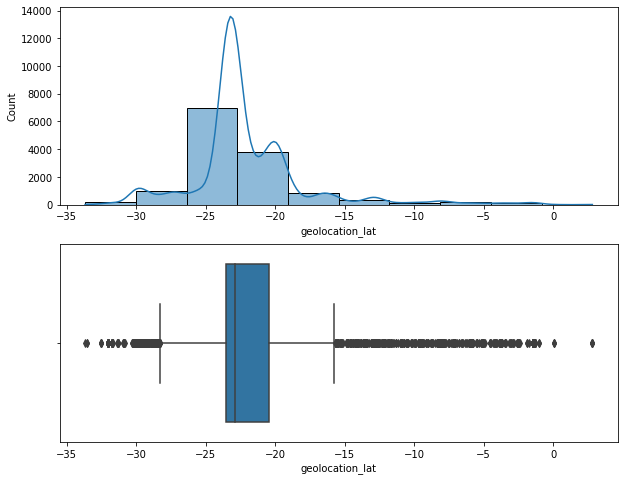

************************************************************
geolocation_lng
jumlah outlier: 524
jumlah non_outlier 13121
upper whisker: -37.09752376430288
lower whisker: -53.78050891145901
skewness: -0.3501082329544537
data pada kolom geolocation_lng negatively-skewed
p-value: 3.066632635349025e-59
Data pada kolom geolocation_lng terdistribusi asimetris


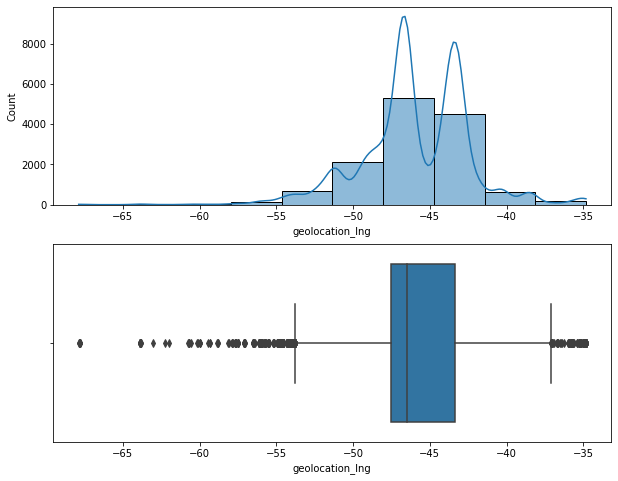

************************************************************
order_item_id
jumlah outlier: 13645
jumlah non_outlier 11879
upper whisker: 1.0
lower whisker: 1.0
skewness: 6.706434122316712
data pada kolom order_item_id positively-skewed
p-value: 0.0
Data pada kolom order_item_id terdistribusi asimetris


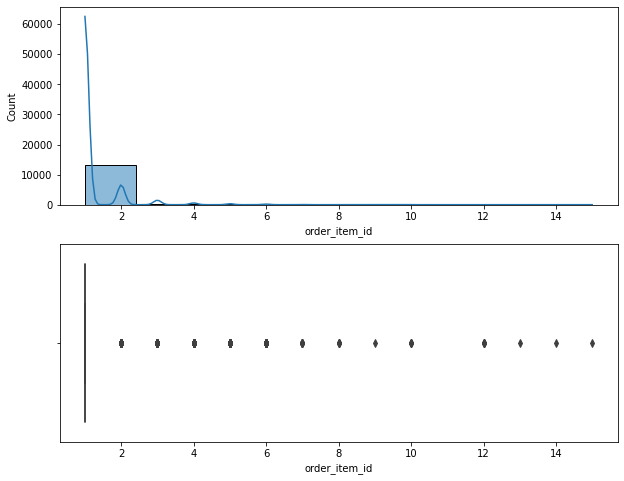

************************************************************
price
jumlah outlier: 981
jumlah non_outlier 12664
upper whisker: 275.0
lower whisker: 1.2
skewness: 7.936018628729487
data pada kolom price positively-skewed
p-value: 0.0
Data pada kolom price terdistribusi asimetris


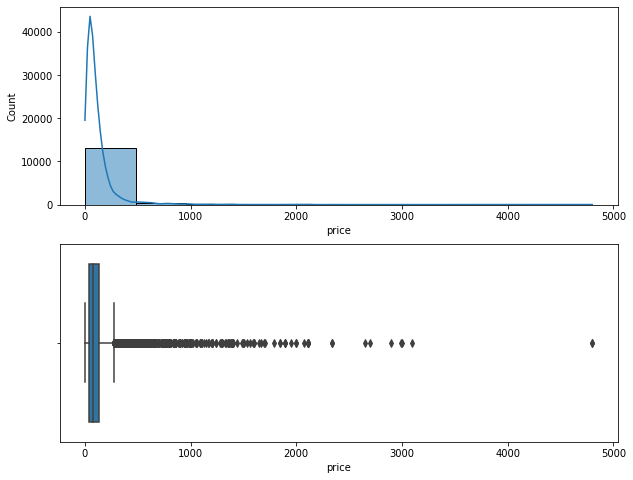

************************************************************
freight_value
jumlah outlier: 1410
jumlah non_outlier 12237
upper whisker: 30.84
lower whisker: 3.09
skewness: 6.583180485474206
data pada kolom freight_value positively-skewed
p-value: 0.0
Data pada kolom freight_value terdistribusi asimetris


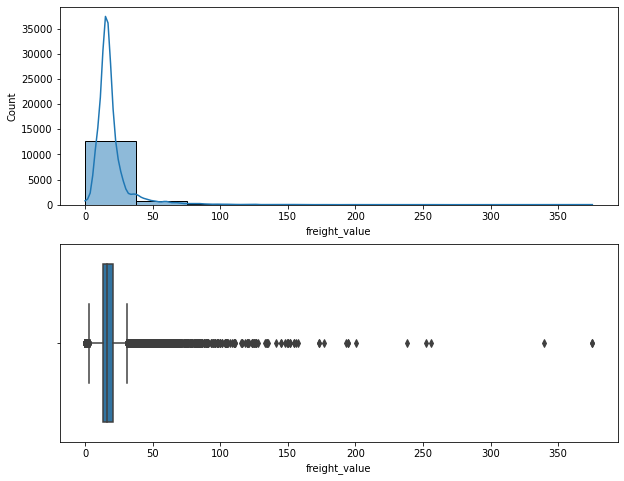

************************************************************
payment_sequential
jumlah outlier: 13644
jumlah non_outlier 13025
upper whisker: 1.0
lower whisker: 1.0
skewness: nan
data pada kolom payment_sequential negatively-skewed
p-value: nan
Data pada kolom payment_sequential terdistribusi asimetris


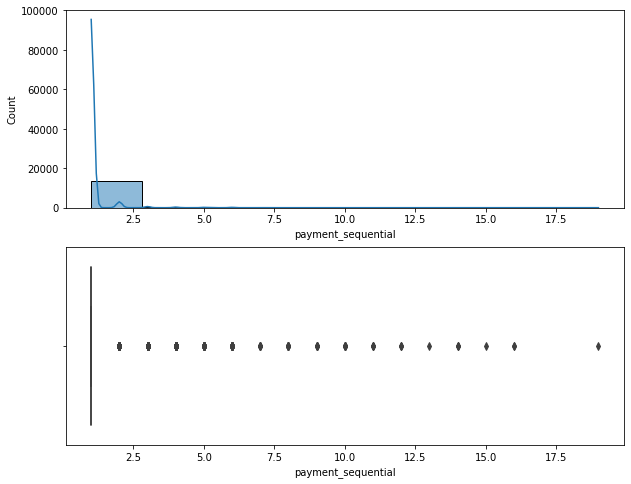

************************************************************
payment_installments
jumlah outlier: 861
jumlah non_outlier 12783
upper whisker: 8.0
lower whisker: 1.0
skewness: nan
data pada kolom payment_installments negatively-skewed
p-value: nan
Data pada kolom payment_installments terdistribusi asimetris


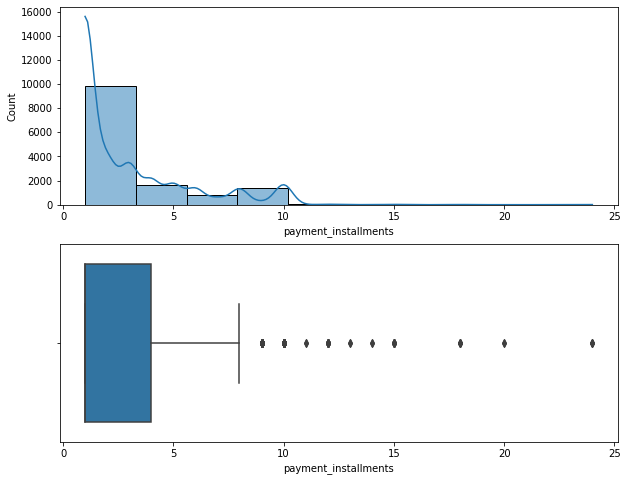

************************************************************
payment_value
jumlah outlier: 1100
jumlah non_outlier 12544
upper whisker: 378.4
lower whisker: 0.01
skewness: nan
data pada kolom payment_value negatively-skewed
p-value: nan
Data pada kolom payment_value terdistribusi asimetris


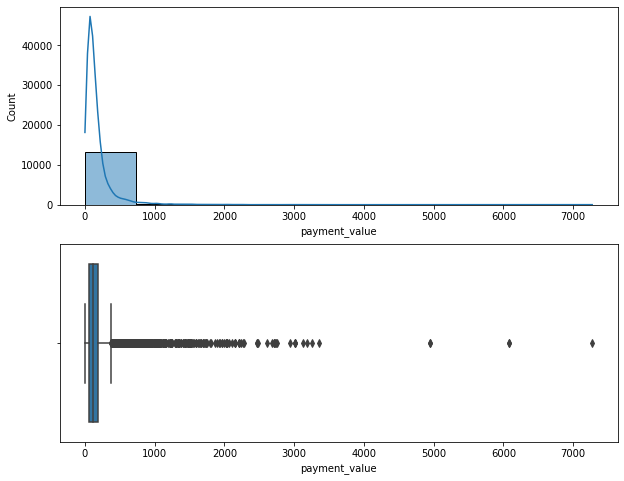

************************************************************
product_name_lenght
jumlah outlier: 107
jumlah non_outlier 13346
upper whisker: 66.0
lower whisker: 20.0
skewness: nan
data pada kolom product_name_lenght negatively-skewed
p-value: nan
Data pada kolom product_name_lenght terdistribusi asimetris


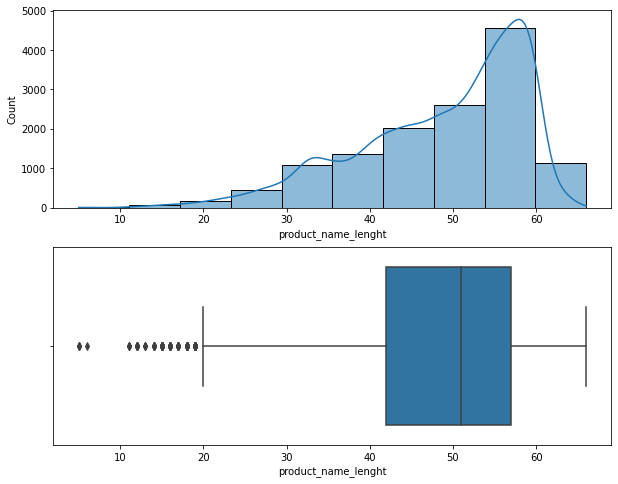

************************************************************
product_description_lenght
jumlah outlier: 943
jumlah non_outlier 12510
upper whisker: 1887.0
lower whisker: 4.0
skewness: nan
data pada kolom product_description_lenght negatively-skewed
p-value: nan
Data pada kolom product_description_lenght terdistribusi asimetris


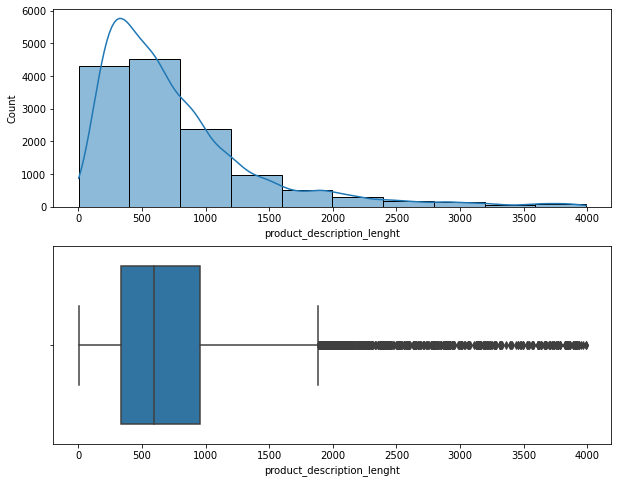

************************************************************
product_photos_qty
jumlah outlier: 805
jumlah non_outlier 13086
upper whisker: 6.0
lower whisker: 1.0
skewness: nan
data pada kolom product_photos_qty negatively-skewed
p-value: nan
Data pada kolom product_photos_qty terdistribusi asimetris


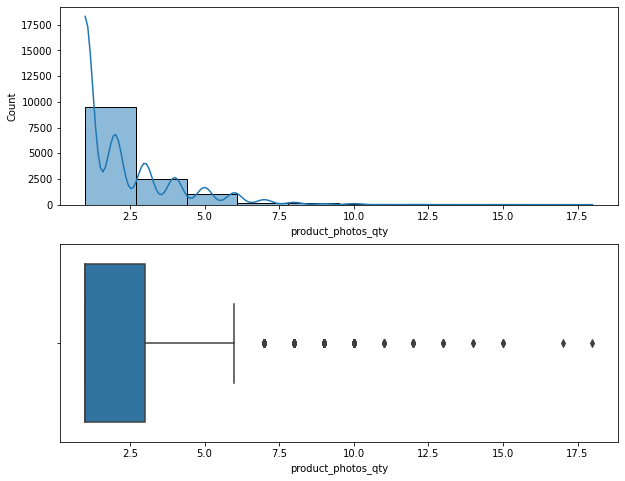

************************************************************
product_weight_g
jumlah outlier: 1924
jumlah non_outlier 11716
upper whisker: 4075.0
lower whisker: 2.0
skewness: nan
data pada kolom product_weight_g negatively-skewed
p-value: nan
Data pada kolom product_weight_g terdistribusi asimetris


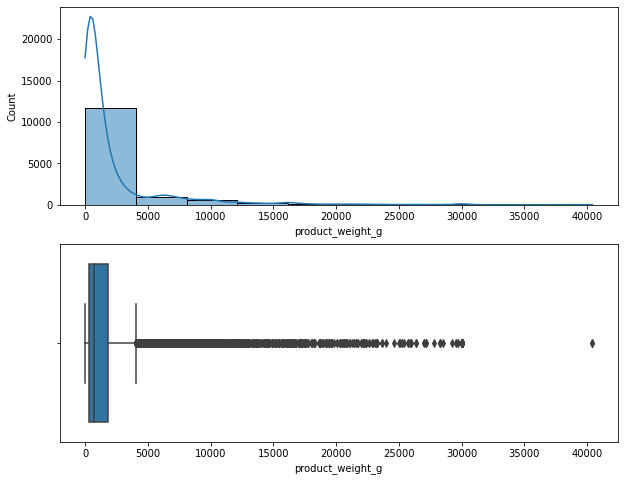

************************************************************
product_length_cm
jumlah outlier: 510
jumlah non_outlier 13159
upper whisker: 68.0
lower whisker: 7.0
skewness: nan
data pada kolom product_length_cm negatively-skewed
p-value: nan
Data pada kolom product_length_cm terdistribusi asimetris


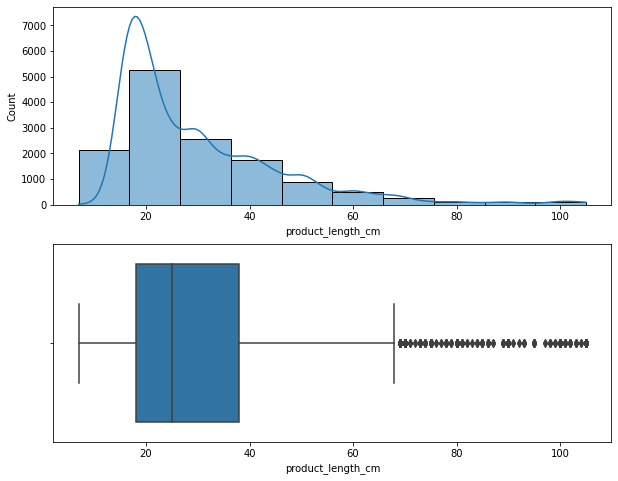

************************************************************
product_height_cm
jumlah outlier: 968
jumlah non_outlier 12696
upper whisker: 38.0
lower whisker: 2.0
skewness: nan
data pada kolom product_height_cm negatively-skewed
p-value: nan
Data pada kolom product_height_cm terdistribusi asimetris


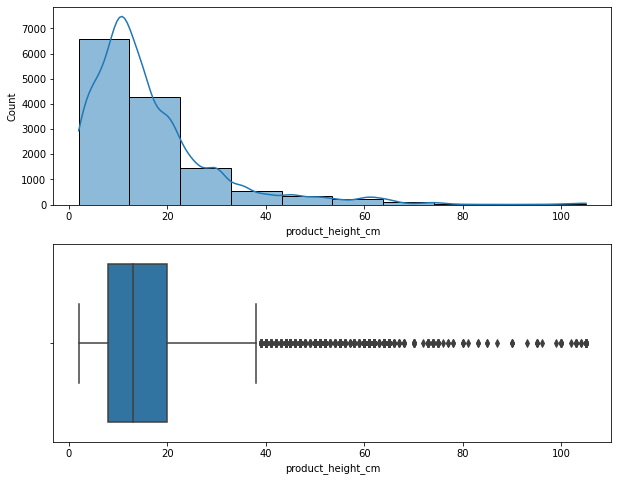

************************************************************
product_width_cm
jumlah outlier: 317
jumlah non_outlier 13323
upper whisker: 52.0
lower whisker: 6.0
skewness: nan
data pada kolom product_width_cm negatively-skewed
p-value: nan
Data pada kolom product_width_cm terdistribusi asimetris


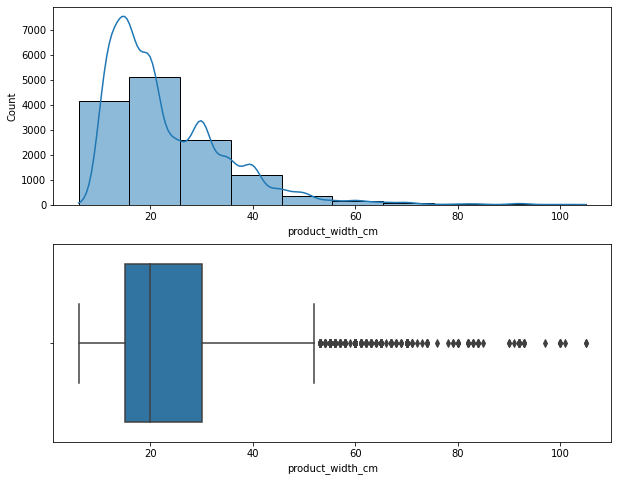

************************************************************
label
jumlah outlier: 0
jumlah non_outlier 13645
upper whisker: 1
lower whisker: 0
skewness: -0.334863412853966
data pada kolom label negatively-skewed
p-value: 1.3660042481765618e-54
Data pada kolom label terdistribusi asimetris


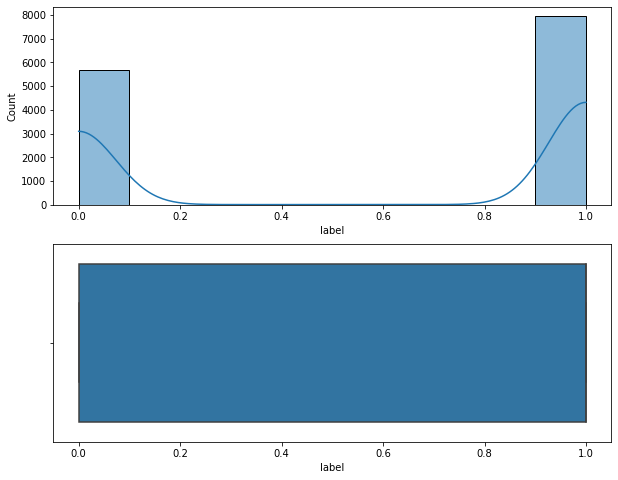

************************************************************


In [10]:
# EDA univariat untuk fitur numerik
for column in df_train_num.columns:
    analyze_visualize(df_train, column)
    print("***" * 20)

In [11]:
# EDA univariat untuk fitur kategorik
for index, column in enumerate(df_train_obj.columns):
    print(index + 1, column)
    print(f"jumlah kategori unik dalam fitur {column}: {len(df_train[column].unique())}")
    print(df_train[column].value_counts())
    print("***" * 20)

1 customer_city
jumlah kategori unik dalam fitur customer_city: 1167
rio de janeiro    1716
sao paulo         1248
belo horizonte     698
niteroi            436
curitiba           234
                  ... 
santa teresa         1
capelinha            1
arapiraca            1
ortigueira           1
sales oliveira       1
Name: customer_city, Length: 1167, dtype: int64
************************************************************
2 customer_state
jumlah kategori unik dalam fitur customer_state: 27
SP    5118
RJ    2734
MG    2648
RS     755
PR     557
SC     454
BA     305
ES     255
GO     130
MT     123
PE      99
DF      81
PA      78
MS      50
CE      48
MA      37
AL      30
PB      28
RN      24
PI      22
SE      21
RO      16
TO      13
AC       7
RR       5
AM       4
AP       3
Name: customer_state, dtype: int64
************************************************************
3 geolocation_city
jumlah kategori unik dalam fitur geolocation_city: 1352
rio de janeiro    1715
sao paulo

### EDA multivariat numerik-numerik

geolocation_lat geolocation_lng


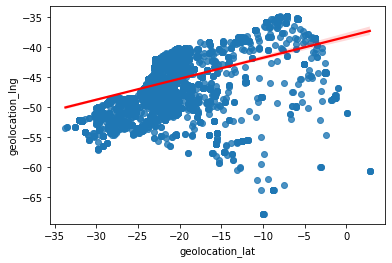

SpearmanrResult(correlation=0.43396598903819816, pvalue=0.0)
************************************************************
geolocation_lat order_item_id


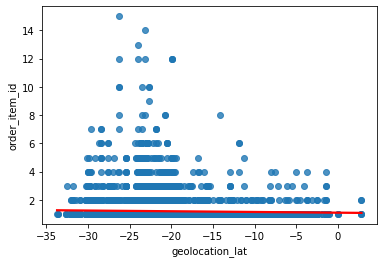

SpearmanrResult(correlation=-0.025185870457525406, pvalue=0.0032588477599655575)
************************************************************
geolocation_lat price


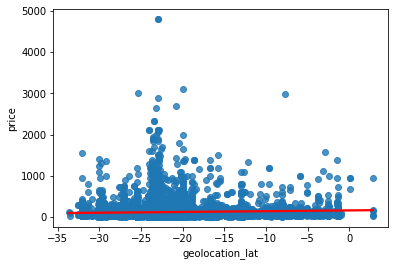

SpearmanrResult(correlation=0.04264811873377138, pvalue=6.240716784510534e-07)
************************************************************
geolocation_lat freight_value


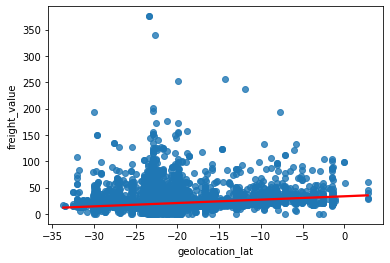

SpearmanrResult(correlation=0.24466567978978038, pvalue=3.7512424371281075e-185)
************************************************************
geolocation_lat payment_sequential


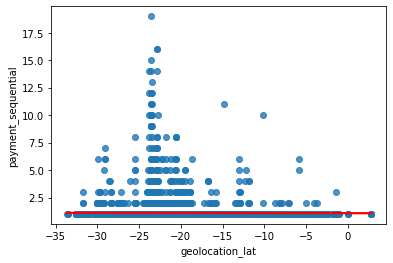

SpearmanrResult(correlation=nan, pvalue=nan)
************************************************************
geolocation_lat payment_installments


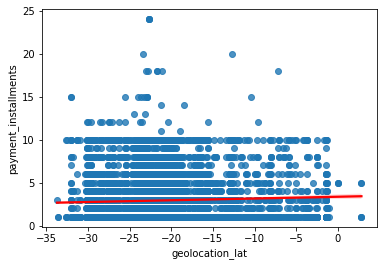

SpearmanrResult(correlation=nan, pvalue=nan)
************************************************************
geolocation_lat payment_value


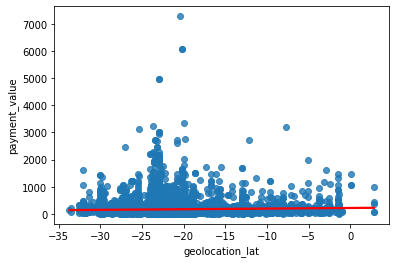

SpearmanrResult(correlation=nan, pvalue=nan)
************************************************************
geolocation_lat product_name_lenght


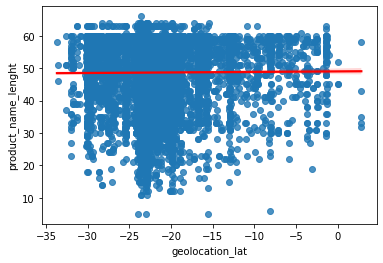

SpearmanrResult(correlation=nan, pvalue=nan)
************************************************************
geolocation_lat product_description_lenght


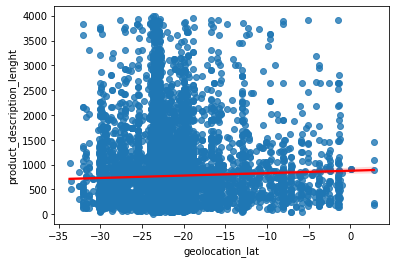

SpearmanrResult(correlation=nan, pvalue=nan)
************************************************************
geolocation_lat product_photos_qty


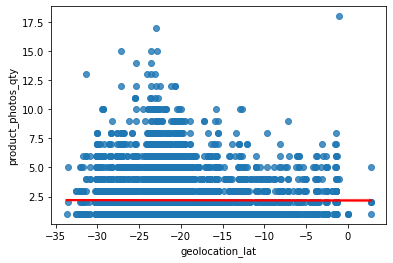

SpearmanrResult(correlation=nan, pvalue=nan)
************************************************************
geolocation_lat product_weight_g


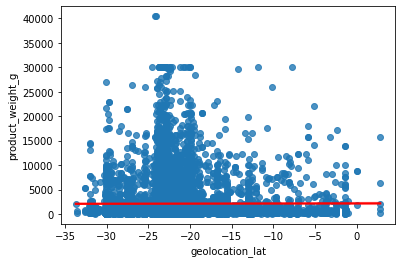

SpearmanrResult(correlation=nan, pvalue=nan)
************************************************************
geolocation_lat product_length_cm


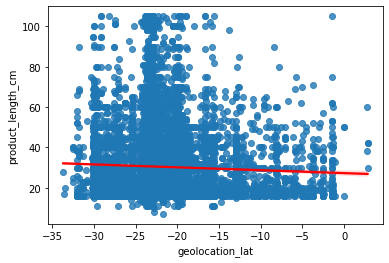

SpearmanrResult(correlation=nan, pvalue=nan)
************************************************************
geolocation_lat product_height_cm


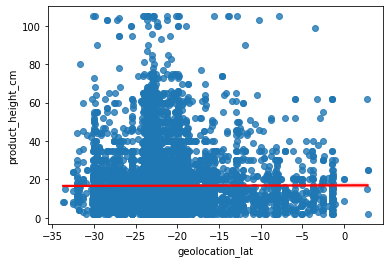

SpearmanrResult(correlation=nan, pvalue=nan)
************************************************************
geolocation_lat product_width_cm


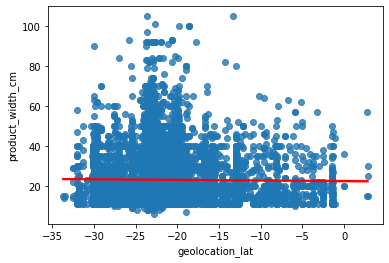

SpearmanrResult(correlation=nan, pvalue=nan)
************************************************************
geolocation_lat label


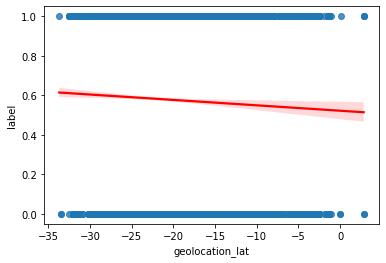

SpearmanrResult(correlation=-0.027818664587058593, pvalue=0.001154537614889279)
************************************************************
geolocation_lng order_item_id


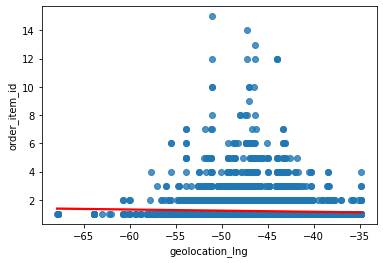

SpearmanrResult(correlation=-0.025015072471809213, pvalue=0.0034751744941635284)
************************************************************
geolocation_lng price


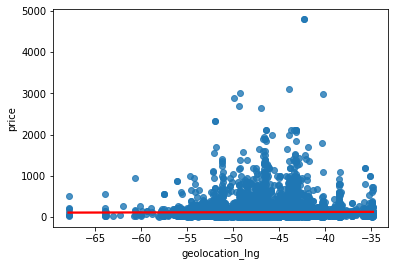

SpearmanrResult(correlation=0.021153907881185048, pvalue=0.013470701088547208)
************************************************************
geolocation_lng freight_value


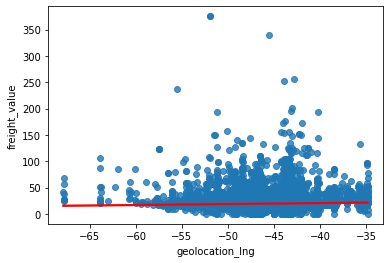

SpearmanrResult(correlation=0.14090702780655542, pvalue=1.8689531181510042e-61)
************************************************************
geolocation_lng payment_sequential


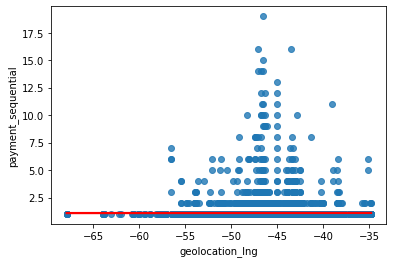

SpearmanrResult(correlation=nan, pvalue=nan)
************************************************************
geolocation_lng payment_installments


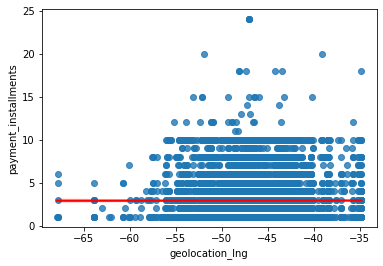

SpearmanrResult(correlation=nan, pvalue=nan)
************************************************************
geolocation_lng payment_value


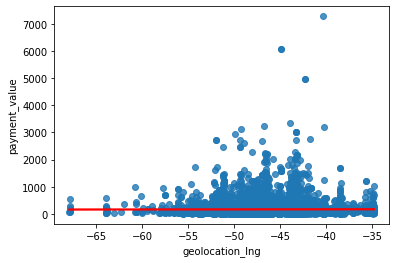

SpearmanrResult(correlation=nan, pvalue=nan)
************************************************************
geolocation_lng product_name_lenght


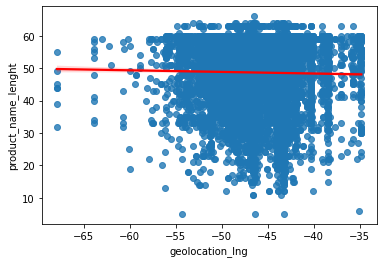

SpearmanrResult(correlation=nan, pvalue=nan)
************************************************************
geolocation_lng product_description_lenght


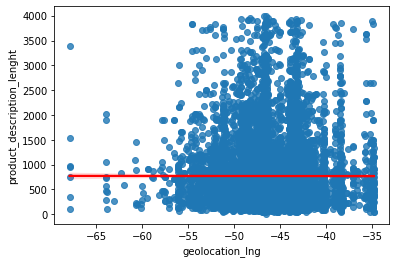

SpearmanrResult(correlation=nan, pvalue=nan)
************************************************************
geolocation_lng product_photos_qty


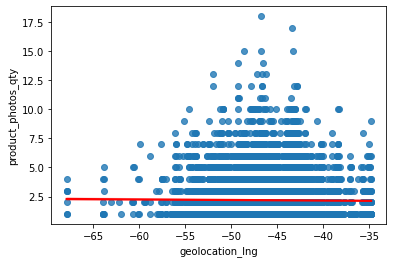

SpearmanrResult(correlation=nan, pvalue=nan)
************************************************************
geolocation_lng product_weight_g


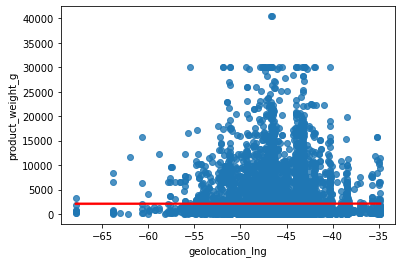

SpearmanrResult(correlation=nan, pvalue=nan)
************************************************************
geolocation_lng product_length_cm


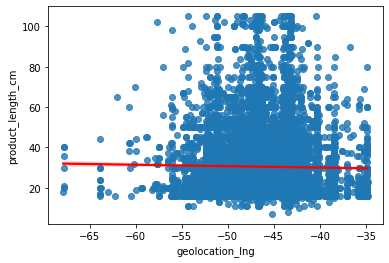

SpearmanrResult(correlation=nan, pvalue=nan)
************************************************************
geolocation_lng product_height_cm


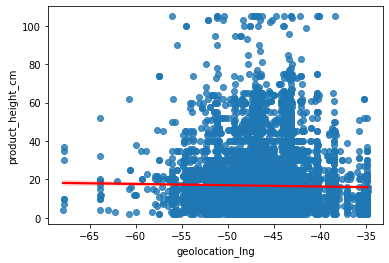

SpearmanrResult(correlation=nan, pvalue=nan)
************************************************************
geolocation_lng product_width_cm


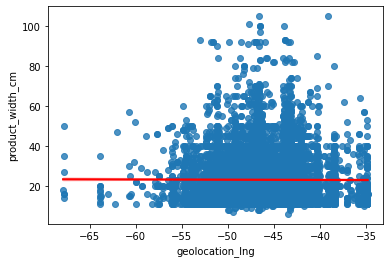

SpearmanrResult(correlation=nan, pvalue=nan)
************************************************************
geolocation_lng label


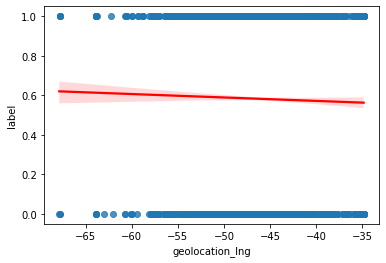

SpearmanrResult(correlation=-0.015225029085216253, pvalue=0.07533762302701329)
************************************************************
order_item_id price


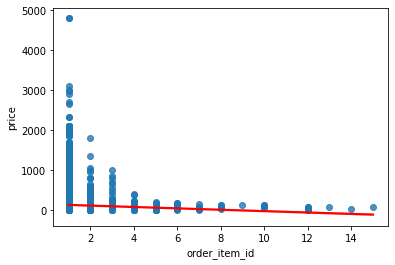

SpearmanrResult(correlation=-0.12389698166012934, pvalue=8.135574258952897e-48)
************************************************************
order_item_id freight_value


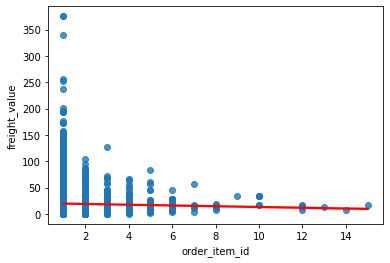

SpearmanrResult(correlation=-0.05015761133160251, pvalue=4.568994694797456e-09)
************************************************************
order_item_id payment_sequential


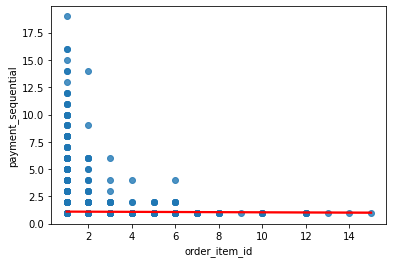

SpearmanrResult(correlation=nan, pvalue=nan)
************************************************************
order_item_id payment_installments


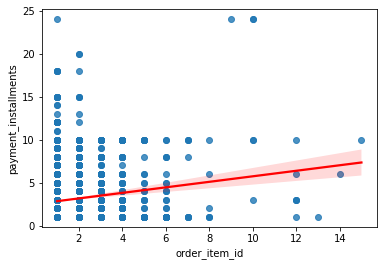

SpearmanrResult(correlation=nan, pvalue=nan)
************************************************************
order_item_id payment_value


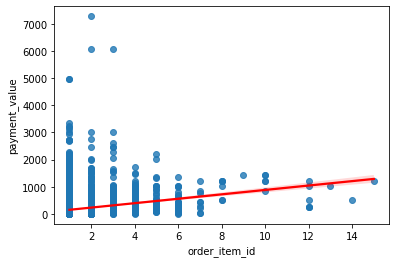

SpearmanrResult(correlation=nan, pvalue=nan)
************************************************************
order_item_id product_name_lenght


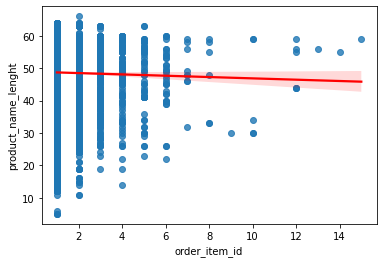

SpearmanrResult(correlation=nan, pvalue=nan)
************************************************************
order_item_id product_description_lenght


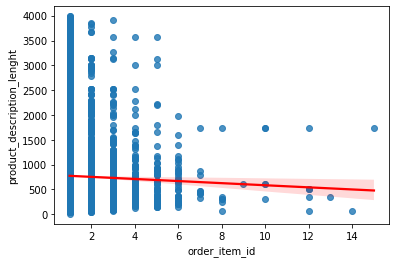

SpearmanrResult(correlation=nan, pvalue=nan)
************************************************************
order_item_id product_photos_qty


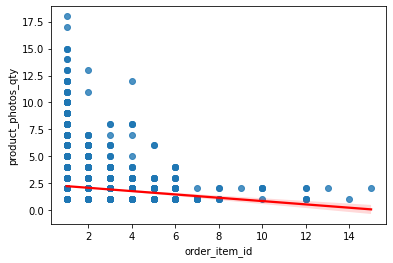

SpearmanrResult(correlation=nan, pvalue=nan)
************************************************************
order_item_id product_weight_g


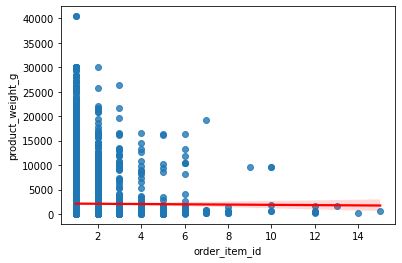

SpearmanrResult(correlation=nan, pvalue=nan)
************************************************************
order_item_id product_length_cm


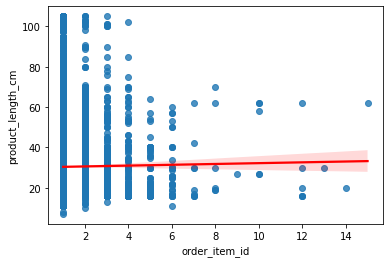

SpearmanrResult(correlation=nan, pvalue=nan)
************************************************************
order_item_id product_height_cm


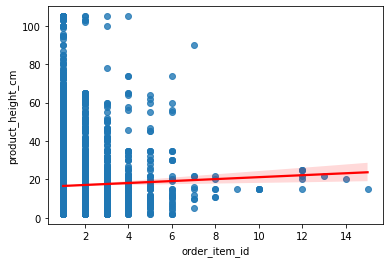

SpearmanrResult(correlation=nan, pvalue=nan)
************************************************************
order_item_id product_width_cm


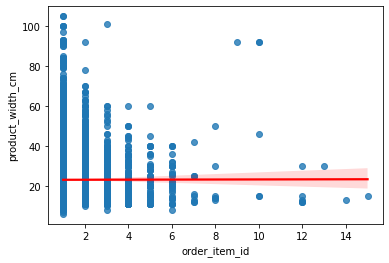

SpearmanrResult(correlation=nan, pvalue=nan)
************************************************************
order_item_id label


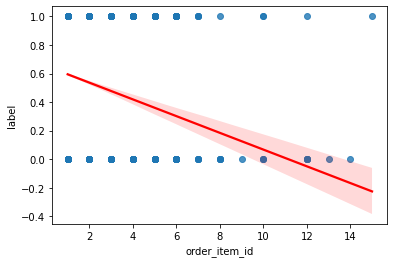

SpearmanrResult(correlation=-0.09257909355576331, pvalue=2.308441464584793e-27)
************************************************************
price freight_value


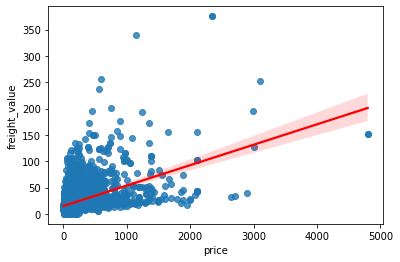

SpearmanrResult(correlation=0.43516466163465534, pvalue=0.0)
************************************************************
price payment_sequential


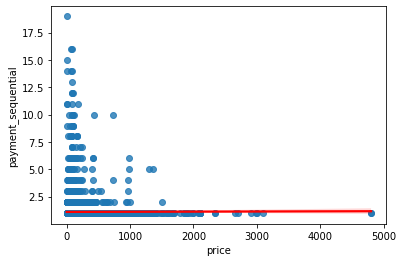

SpearmanrResult(correlation=nan, pvalue=nan)
************************************************************
price payment_installments


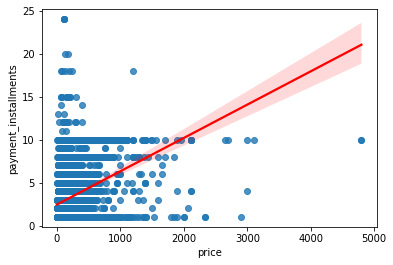

SpearmanrResult(correlation=nan, pvalue=nan)
************************************************************
price payment_value


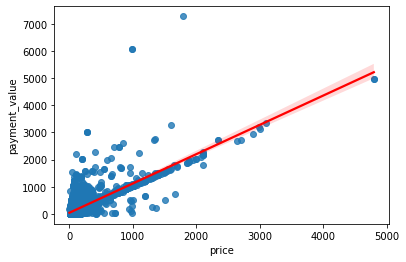

SpearmanrResult(correlation=nan, pvalue=nan)
************************************************************
price product_name_lenght


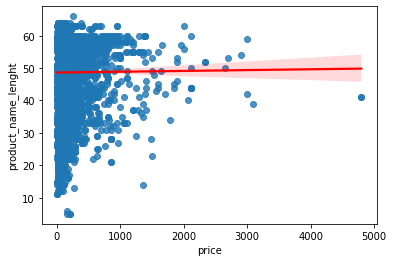

SpearmanrResult(correlation=nan, pvalue=nan)
************************************************************
price product_description_lenght


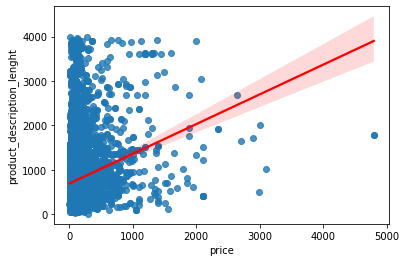

SpearmanrResult(correlation=nan, pvalue=nan)
************************************************************
price product_photos_qty


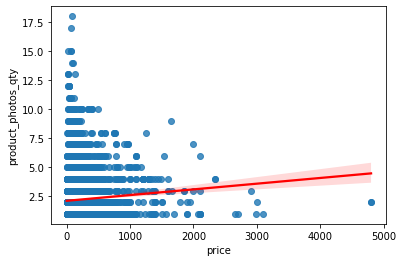

SpearmanrResult(correlation=nan, pvalue=nan)
************************************************************
price product_weight_g


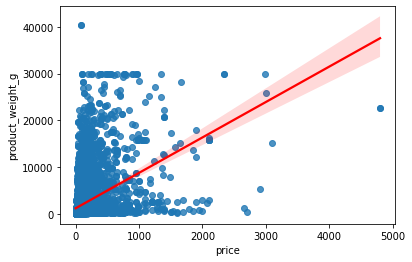

SpearmanrResult(correlation=nan, pvalue=nan)
************************************************************
price product_length_cm


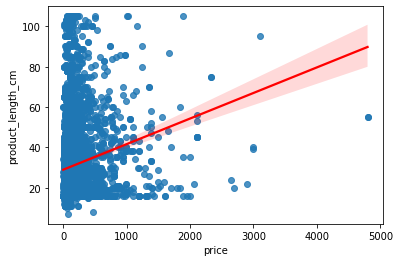

SpearmanrResult(correlation=nan, pvalue=nan)
************************************************************
price product_height_cm


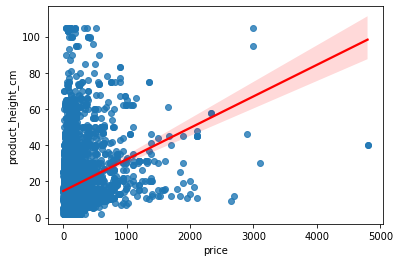

SpearmanrResult(correlation=nan, pvalue=nan)
************************************************************
price product_width_cm


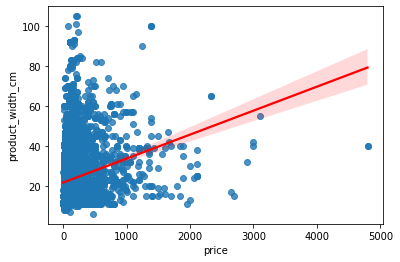

SpearmanrResult(correlation=nan, pvalue=nan)
************************************************************
price label


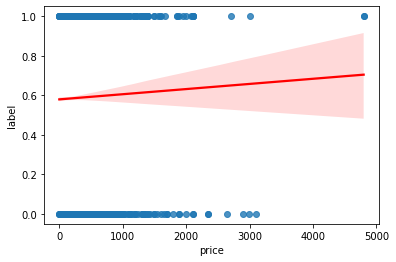

SpearmanrResult(correlation=0.004166626288968311, pvalue=0.6264931294491893)
************************************************************
freight_value payment_sequential


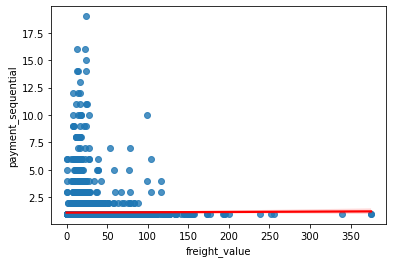

SpearmanrResult(correlation=nan, pvalue=nan)
************************************************************
freight_value payment_installments


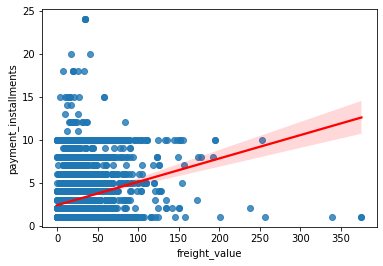

SpearmanrResult(correlation=nan, pvalue=nan)
************************************************************
freight_value payment_value


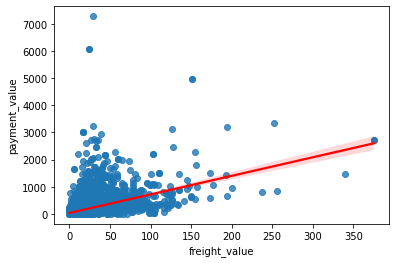

SpearmanrResult(correlation=nan, pvalue=nan)
************************************************************
freight_value product_name_lenght


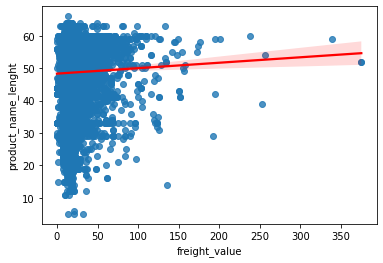

SpearmanrResult(correlation=nan, pvalue=nan)
************************************************************
freight_value product_description_lenght


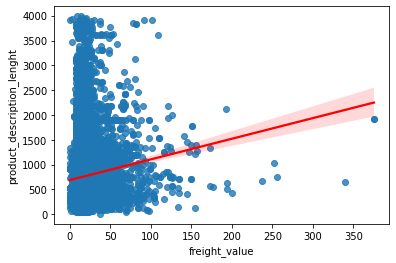

SpearmanrResult(correlation=nan, pvalue=nan)
************************************************************
freight_value product_photos_qty


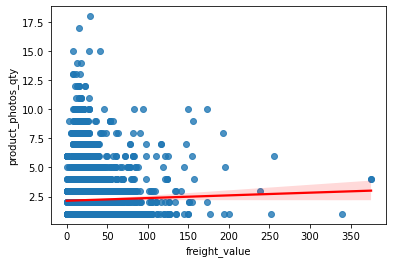

SpearmanrResult(correlation=nan, pvalue=nan)
************************************************************
freight_value product_weight_g


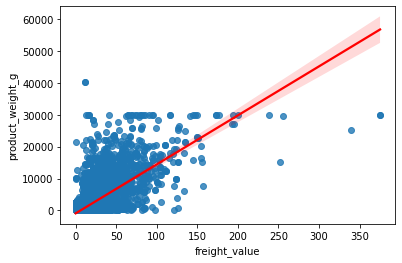

SpearmanrResult(correlation=nan, pvalue=nan)
************************************************************
freight_value product_length_cm


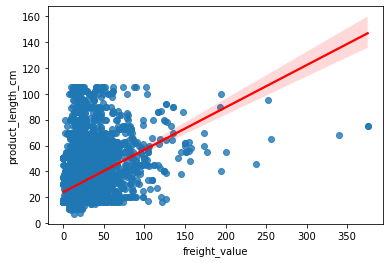

SpearmanrResult(correlation=nan, pvalue=nan)
************************************************************
freight_value product_height_cm


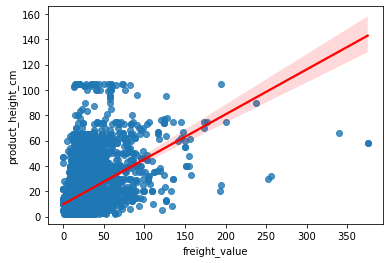

SpearmanrResult(correlation=nan, pvalue=nan)
************************************************************
freight_value product_width_cm


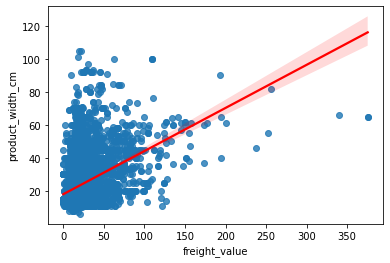

SpearmanrResult(correlation=nan, pvalue=nan)
************************************************************
freight_value label


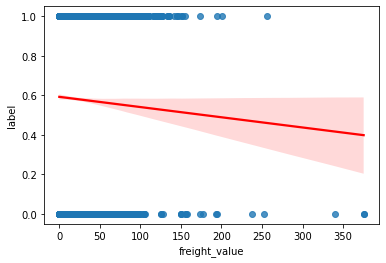

SpearmanrResult(correlation=-0.03400706134154623, pvalue=7.090995889529182e-05)
************************************************************
payment_sequential payment_installments


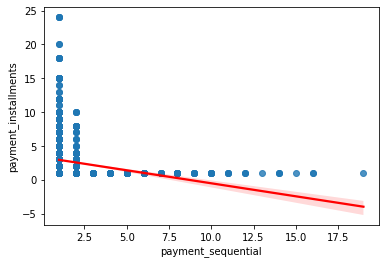

SpearmanrResult(correlation=nan, pvalue=nan)
************************************************************
payment_sequential payment_value


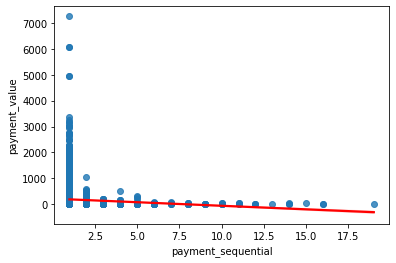

SpearmanrResult(correlation=nan, pvalue=nan)
************************************************************
payment_sequential product_name_lenght


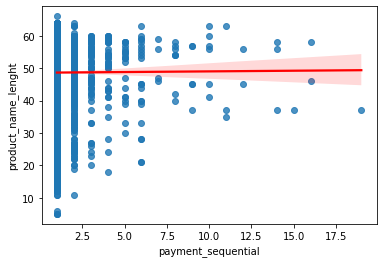

SpearmanrResult(correlation=nan, pvalue=nan)
************************************************************
payment_sequential product_description_lenght


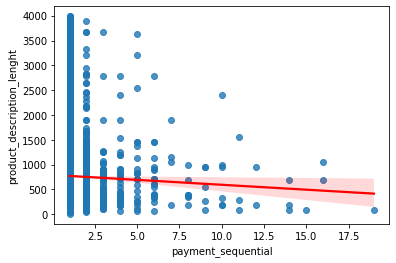

SpearmanrResult(correlation=nan, pvalue=nan)
************************************************************
payment_sequential product_photos_qty


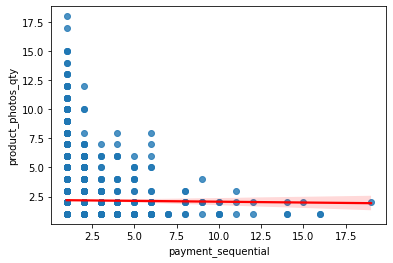

SpearmanrResult(correlation=nan, pvalue=nan)
************************************************************
payment_sequential product_weight_g


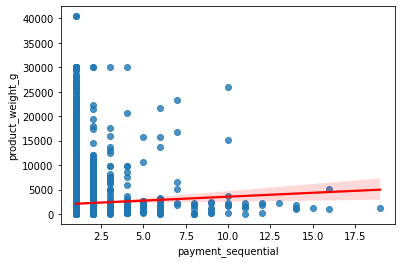

SpearmanrResult(correlation=nan, pvalue=nan)
************************************************************
payment_sequential product_length_cm


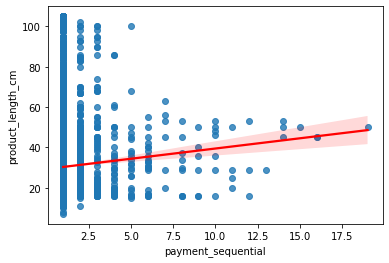

SpearmanrResult(correlation=nan, pvalue=nan)
************************************************************
payment_sequential product_height_cm


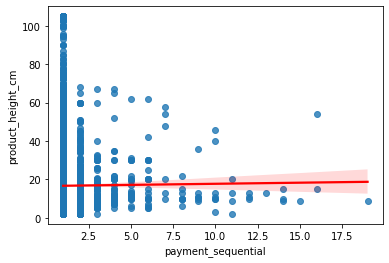

SpearmanrResult(correlation=nan, pvalue=nan)
************************************************************
payment_sequential product_width_cm


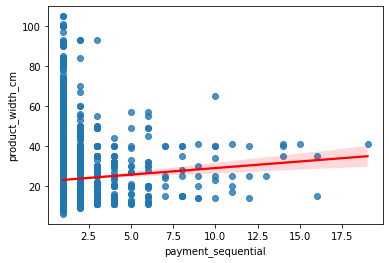

SpearmanrResult(correlation=nan, pvalue=nan)
************************************************************
payment_sequential label


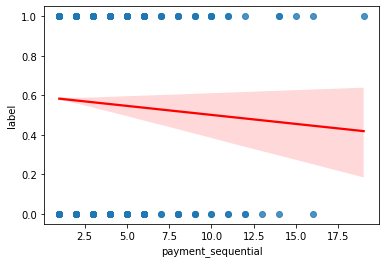

SpearmanrResult(correlation=nan, pvalue=nan)
************************************************************
payment_installments payment_value


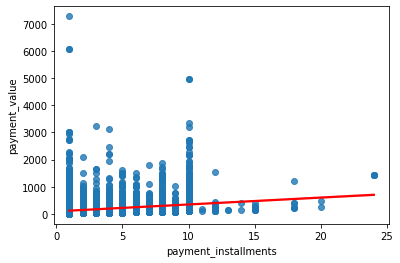

SpearmanrResult(correlation=nan, pvalue=nan)
************************************************************
payment_installments product_name_lenght


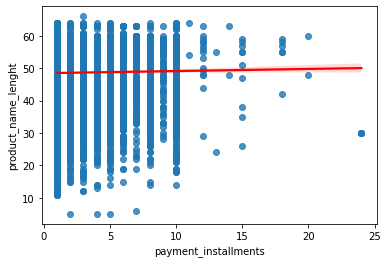

SpearmanrResult(correlation=nan, pvalue=nan)
************************************************************
payment_installments product_description_lenght


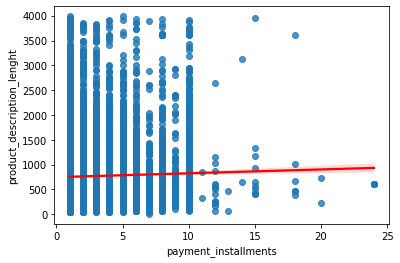

SpearmanrResult(correlation=nan, pvalue=nan)
************************************************************
payment_installments product_photos_qty


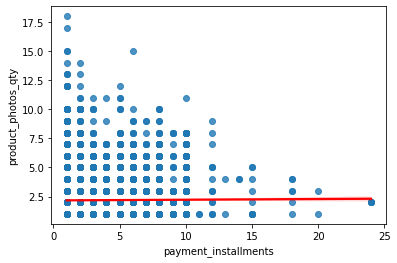

SpearmanrResult(correlation=nan, pvalue=nan)
************************************************************
payment_installments product_weight_g


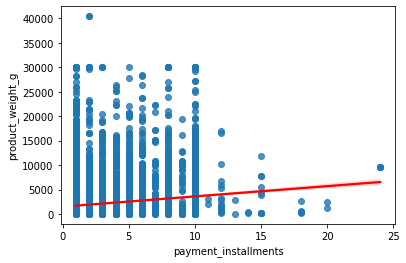

SpearmanrResult(correlation=nan, pvalue=nan)
************************************************************
payment_installments product_length_cm


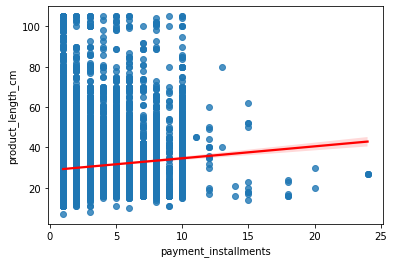

SpearmanrResult(correlation=nan, pvalue=nan)
************************************************************
payment_installments product_height_cm


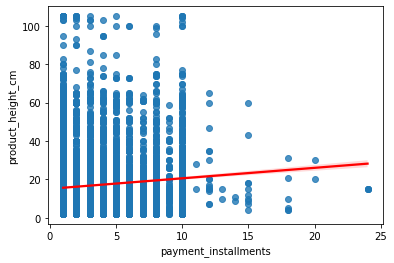

SpearmanrResult(correlation=nan, pvalue=nan)
************************************************************
payment_installments product_width_cm


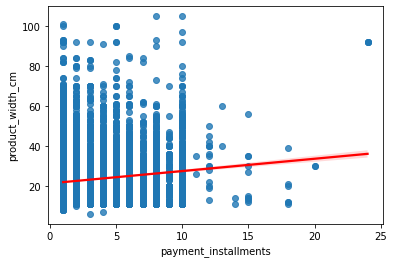

SpearmanrResult(correlation=nan, pvalue=nan)
************************************************************
payment_installments label


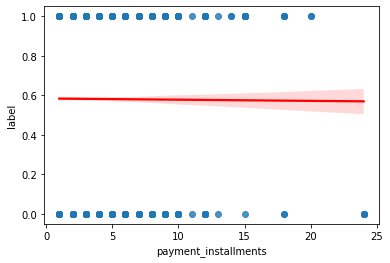

SpearmanrResult(correlation=nan, pvalue=nan)
************************************************************
payment_value product_name_lenght


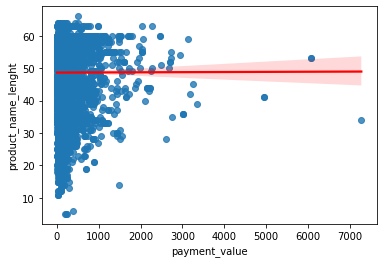

SpearmanrResult(correlation=nan, pvalue=nan)
************************************************************
payment_value product_description_lenght


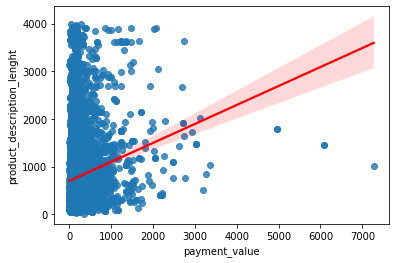

SpearmanrResult(correlation=nan, pvalue=nan)
************************************************************
payment_value product_photos_qty


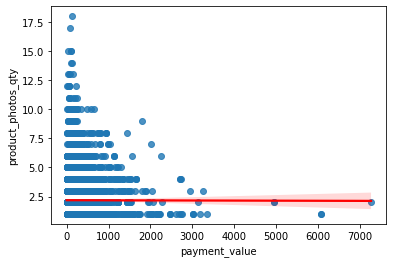

SpearmanrResult(correlation=nan, pvalue=nan)
************************************************************
payment_value product_weight_g


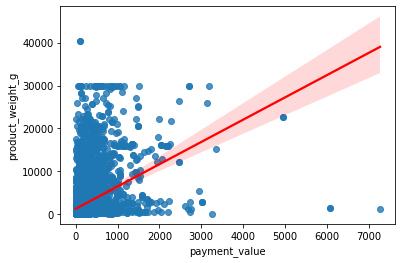

SpearmanrResult(correlation=nan, pvalue=nan)
************************************************************
payment_value product_length_cm


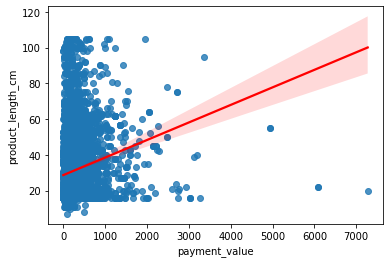

SpearmanrResult(correlation=nan, pvalue=nan)
************************************************************
payment_value product_height_cm


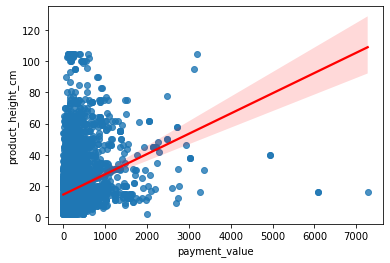

SpearmanrResult(correlation=nan, pvalue=nan)
************************************************************
payment_value product_width_cm


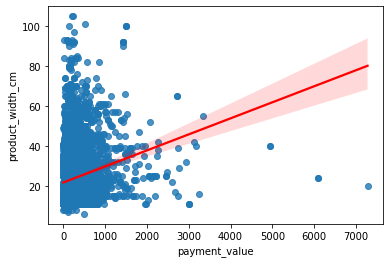

SpearmanrResult(correlation=nan, pvalue=nan)
************************************************************
payment_value label


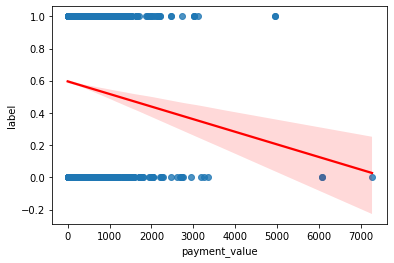

SpearmanrResult(correlation=nan, pvalue=nan)
************************************************************
product_name_lenght product_description_lenght


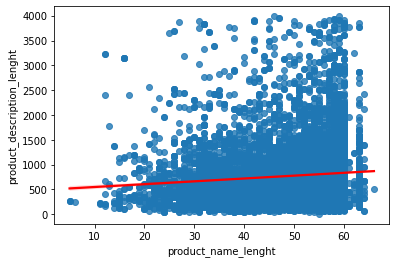

SpearmanrResult(correlation=nan, pvalue=nan)
************************************************************
product_name_lenght product_photos_qty


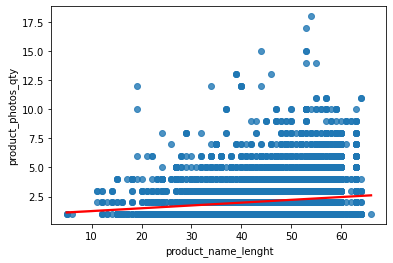

SpearmanrResult(correlation=nan, pvalue=nan)
************************************************************
product_name_lenght product_weight_g


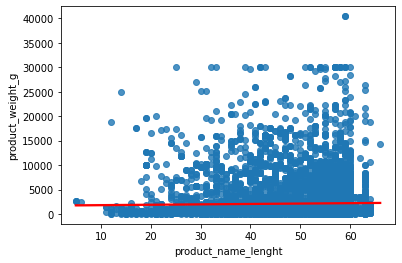

SpearmanrResult(correlation=nan, pvalue=nan)
************************************************************
product_name_lenght product_length_cm


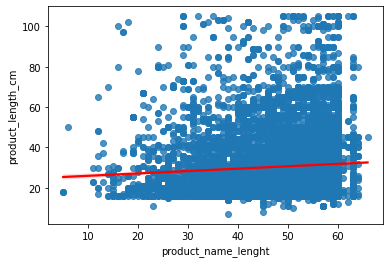

SpearmanrResult(correlation=nan, pvalue=nan)
************************************************************
product_name_lenght product_height_cm


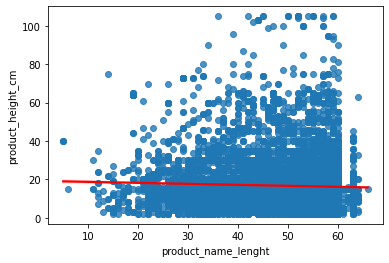

SpearmanrResult(correlation=nan, pvalue=nan)
************************************************************
product_name_lenght product_width_cm


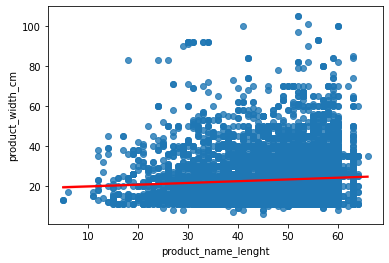

SpearmanrResult(correlation=nan, pvalue=nan)
************************************************************
product_name_lenght label


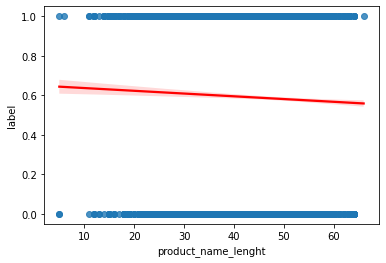

SpearmanrResult(correlation=nan, pvalue=nan)
************************************************************
product_description_lenght product_photos_qty


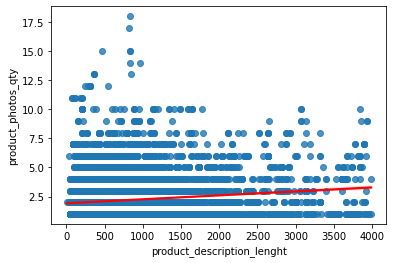

SpearmanrResult(correlation=nan, pvalue=nan)
************************************************************
product_description_lenght product_weight_g


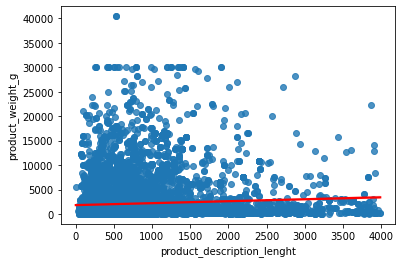

SpearmanrResult(correlation=nan, pvalue=nan)
************************************************************
product_description_lenght product_length_cm


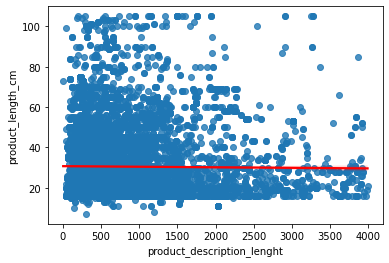

SpearmanrResult(correlation=nan, pvalue=nan)
************************************************************
product_description_lenght product_height_cm


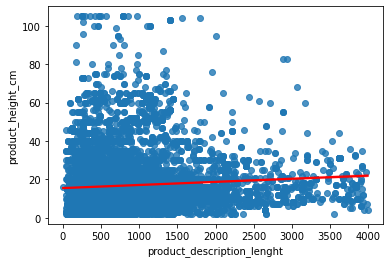

SpearmanrResult(correlation=nan, pvalue=nan)
************************************************************
product_description_lenght product_width_cm


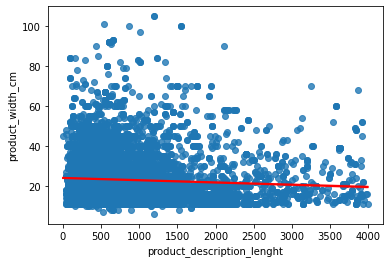

SpearmanrResult(correlation=nan, pvalue=nan)
************************************************************
product_description_lenght label


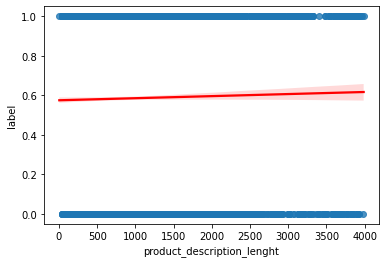

SpearmanrResult(correlation=nan, pvalue=nan)
************************************************************
product_photos_qty product_weight_g


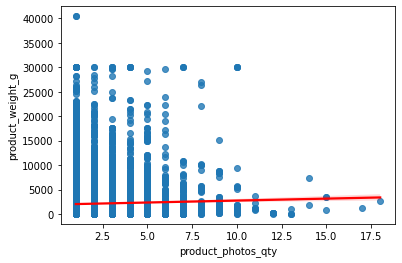

SpearmanrResult(correlation=nan, pvalue=nan)
************************************************************
product_photos_qty product_length_cm


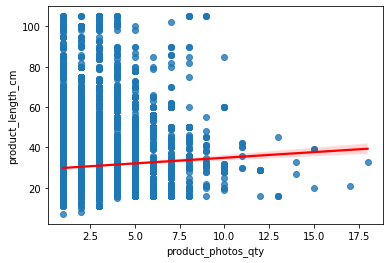

SpearmanrResult(correlation=nan, pvalue=nan)
************************************************************
product_photos_qty product_height_cm


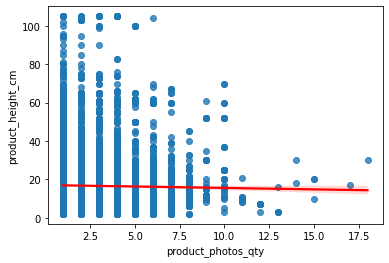

SpearmanrResult(correlation=nan, pvalue=nan)
************************************************************
product_photos_qty product_width_cm


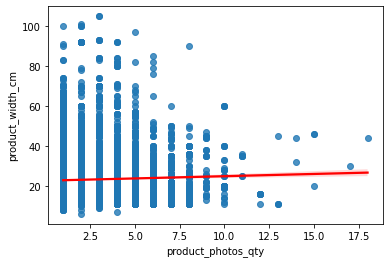

SpearmanrResult(correlation=nan, pvalue=nan)
************************************************************
product_photos_qty label


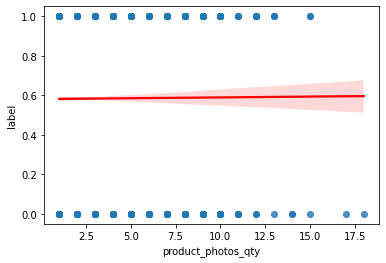

SpearmanrResult(correlation=nan, pvalue=nan)
************************************************************
product_weight_g product_length_cm


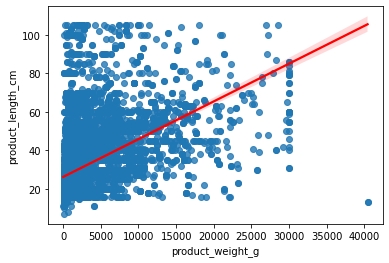

SpearmanrResult(correlation=nan, pvalue=nan)
************************************************************
product_weight_g product_height_cm


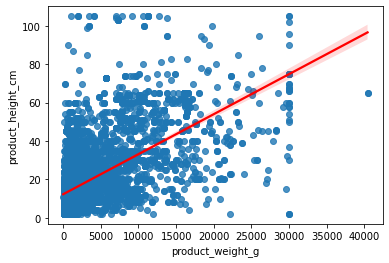

SpearmanrResult(correlation=nan, pvalue=nan)
************************************************************
product_weight_g product_width_cm


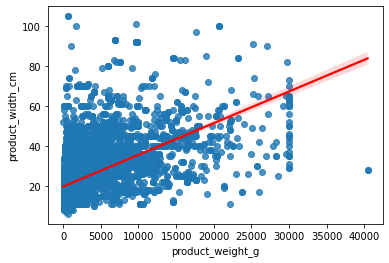

SpearmanrResult(correlation=nan, pvalue=nan)
************************************************************
product_weight_g label


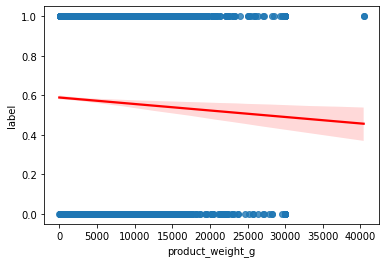

SpearmanrResult(correlation=nan, pvalue=nan)
************************************************************
product_length_cm product_height_cm


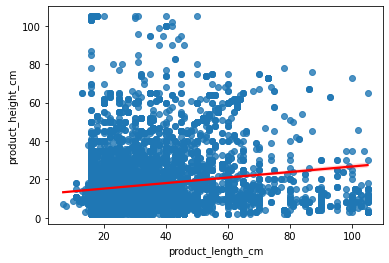

SpearmanrResult(correlation=nan, pvalue=nan)
************************************************************
product_length_cm product_width_cm


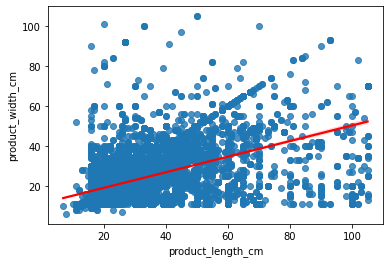

SpearmanrResult(correlation=nan, pvalue=nan)
************************************************************
product_length_cm label


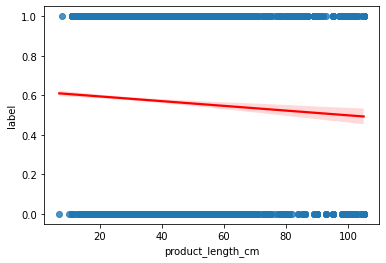

SpearmanrResult(correlation=nan, pvalue=nan)
************************************************************
product_height_cm product_width_cm


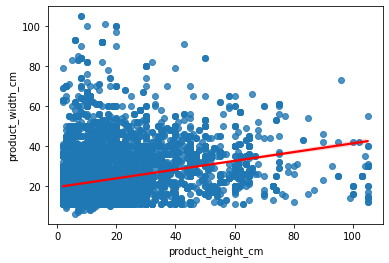

SpearmanrResult(correlation=nan, pvalue=nan)
************************************************************
product_height_cm label


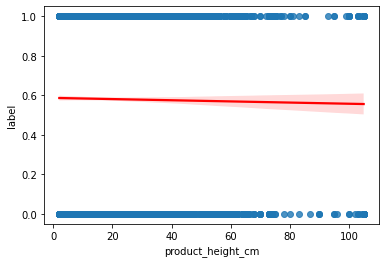

SpearmanrResult(correlation=nan, pvalue=nan)
************************************************************
product_width_cm label


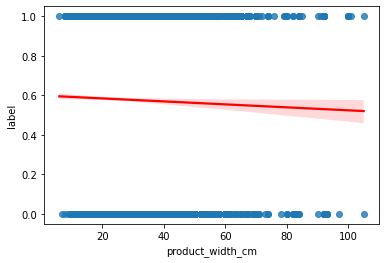

SpearmanrResult(correlation=nan, pvalue=nan)
************************************************************


In [12]:
for column_x, column_y in itertools.combinations(df_train_num.columns, 2):
    print(column_x, column_y)
    sns.regplot(data = df_train, x = column_x, y = column_y, line_kws = {'color': 'red'})
    plt.show()
    
    # normal test
    stat_col_x, pvalue_col_x = st.normaltest(df_train_num[column_x])
    stat_col_y, pvalue_col_y = st.normaltest(df_train_num[column_y])
    
    # jika p-value kedua fitur lebih dari 0.05 maka lakukan pearson test, jika tidak maka lakukan spearman test
    if pvalue_col_x > 0.05 and pvalue_col_y > 0.05:
        print(st.pearsonr(df_train_num[column_x], df_train_num[column_y]))
    else:
        print(st.spearmanr(df_train_num[column_x], df_train_num[column_y]))
    print("***" * 20)

In [13]:
df_train_obj_copy = df_train_obj.copy()
df_train_obj_copy.head()

,customer_city,customer_state,geolocation_city,geolocation_state,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,shipping_limit_date,payment_type,product_category_name,seller_city,seller_state,product_category_name_english
0,rio de janeiro,RJ,rio de janeiro,RJ,delivered,2017-03-20 21:55:02,2017-03-20 21:55:02,2017-03-23 12:22:48,2017-03-30 13:57:07,2017-04-12 00:00:00,2017-03-26 21:55:02,credit_card,moveis_decoracao,brasilia,DF,furniture_decor
1,rio de janeiro,RJ,rio de janeiro,RJ,delivered,2018-05-10 11:23:03,2018-05-10 11:51:37,2018-05-16 15:29:00,2018-05-22 19:03:49,2018-06-14 00:00:00,2018-05-16 11:51:37,credit_card,relogios_presentes,ribeirao preto,SP,watches_gifts
2,rio de janeiro,RJ,rio de janeiro,RJ,delivered,2018-03-19 12:14:50,2018-03-19 12:30:39,2018-03-20 17:58:50,2018-04-02 22:36:51,2018-04-19 00:00:00,2018-03-23 12:30:39,credit_card,cool_stuff,sao paulo,SP,cool_stuff
3,rio de janeiro,RJ,rio de janeiro,RJ,delivered,2017-07-20 12:00:22,2017-07-20 12:10:08,2017-07-24 16:24:55,2017-07-31 19:03:53,2017-08-21 00:00:00,2017-08-03 12:10:08,credit_card,alimentos_bebidas,monteiro lobato,SP,food_drink
4,petrolandia,PE,petrolandia,PE,delivered,2018-01-02 10:32:22,2018-01-03 04:33:26,2018-01-08 19:42:58,2018-01-22 22:19:07,2018-02-14 00:00:00,2018-01-12 04:33:26,boleto,cool_stuff,jacarei,SP,cool_stuff


### EDA Univariat kategorik

In [14]:
# fungsi untuk retrieving top 5 items
def top_5(data):
    data_chart = []
    for item in data.unique():
        data_chart.append([item, data[data == item].count()])
    data_chart.sort(key=lambda item: item[1], reverse=True)
    major_items = np.array(data_chart)
    return major_items[:5, 0]

# fungsi untuk mengganti entry selain major items
def replace_minor_item(item):
    if item not in major_items:
        return "other"
    return item

In [15]:
# mengganti entry selain 5 entry dengan count value terbanyak jika kategori uniknya lebih dari 10
for column in df_train_obj_copy.columns:
    if len(df_train_obj_copy[column].unique()) > 10:
        major_items = top_5(df_train_obj_copy[column])
        df_train_obj_copy[column] = list(map(replace_minor_item, df_train_obj_copy[column]))

C:\Users\Rahman Aziz F\AppData\Local\Temp\ipykernel_6600\1621210082.py:12: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if item not in major_items:


In [16]:
df_train_partially_dropped = pd.concat([df_train_num, df_train_obj_copy], axis=1)
df_train_partially_dropped['label']

0        0
1        1
2        1
3        1
4        1
        ..
13640    1
13641    1
13642    1
13643    1
13644    0
Name: label, Length: 13645, dtype: int64

1 customer_city


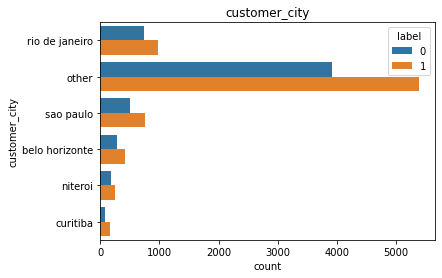

jumlah kategori unik dalam fitur customer_city: 1167
rio de janeiro    1716
sao paulo         1248
belo horizonte     698
niteroi            436
curitiba           234
                  ... 
santa teresa         1
capelinha            1
arapiraca            1
ortigueira           1
sales oliveira       1
Name: customer_city, Length: 1167, dtype: int64
************************************************************
2 customer_state


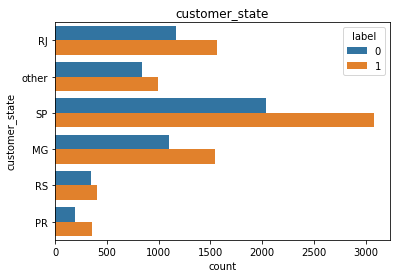

jumlah kategori unik dalam fitur customer_state: 27
SP    5118
RJ    2734
MG    2648
RS     755
PR     557
SC     454
BA     305
ES     255
GO     130
MT     123
PE      99
DF      81
PA      78
MS      50
CE      48
MA      37
AL      30
PB      28
RN      24
PI      22
SE      21
RO      16
TO      13
AC       7
RR       5
AM       4
AP       3
Name: customer_state, dtype: int64
************************************************************
3 geolocation_city


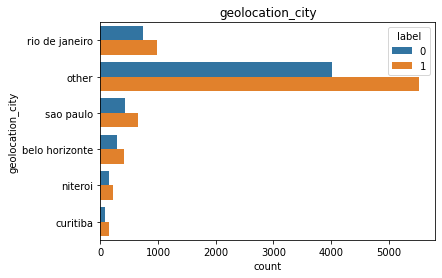

jumlah kategori unik dalam fitur geolocation_city: 1352
rio de janeiro    1715
sao paulo         1076
belo horizonte     698
niteroi            375
curitiba           234
                  ... 
paraiso              1
prudentópolis        1
venâncio aires       1
mossoro              1
sales oliveira       1
Name: geolocation_city, Length: 1352, dtype: int64
************************************************************
4 geolocation_state


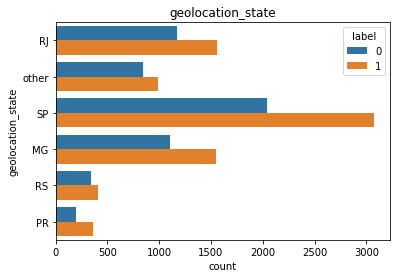

jumlah kategori unik dalam fitur geolocation_state: 27
SP    5118
RJ    2734
MG    2648
RS     755
PR     557
SC     454
BA     305
ES     255
GO     130
MT     123
PE      99
DF      81
PA      78
MS      50
CE      48
MA      37
AL      30
PB      28
RN      24
PI      22
SE      21
RO      16
TO      13
AC       7
RR       5
AM       4
AP       3
Name: geolocation_state, dtype: int64
************************************************************
5 order_status


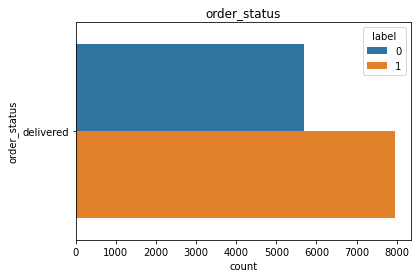

jumlah kategori unik dalam fitur order_status: 1
delivered    13645
Name: order_status, dtype: int64
************************************************************
6 order_purchase_timestamp


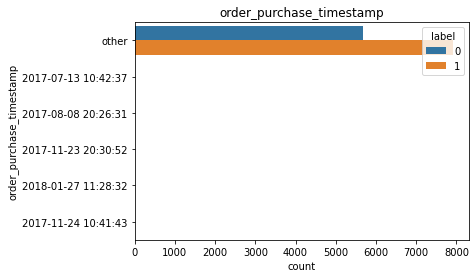

jumlah kategori unik dalam fitur order_purchase_timestamp: 11584
2018-01-27 11:28:32    12
2017-07-13 10:42:37    11
2017-11-23 20:30:52     9
2017-11-24 10:41:43     8
2017-07-13 17:49:51     7
                       ..
2018-04-13 14:41:18     1
2017-07-14 00:08:37     1
2018-06-12 10:33:05     1
2017-07-10 13:03:54     1
2018-05-07 19:35:07     1
Name: order_purchase_timestamp, Length: 11584, dtype: int64
************************************************************
7 order_approved_at


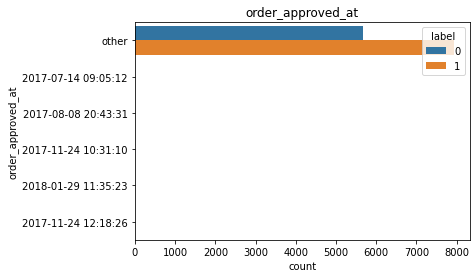

jumlah kategori unik dalam fitur order_approved_at: 11462
2018-01-29 11:35:23    12
2017-07-14 09:05:12    11
2017-11-24 10:31:10     9
2017-11-24 12:18:26     8
2018-08-08 13:35:25     7
                       ..
2017-04-17 21:42:19     1
2018-07-25 11:05:13     1
2017-06-01 13:10:24     1
2018-07-01 17:35:12     1
2018-05-07 19:55:14     1
Name: order_approved_at, Length: 11461, dtype: int64
************************************************************
8 order_delivered_carrier_date


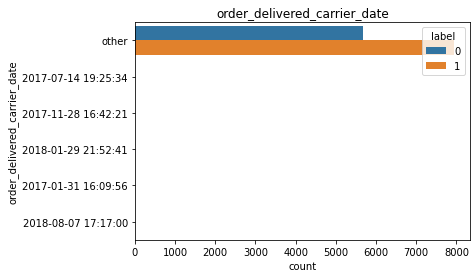

jumlah kategori unik dalam fitur order_delivered_carrier_date: 11239
2018-01-29 21:52:41    12
2017-07-14 19:25:34    11
2017-11-28 16:42:21     9
2018-08-07 17:17:00     8
2017-12-08 16:46:58     8
                       ..
2018-08-27 14:18:00     1
2018-01-17 01:08:46     1
2018-03-16 17:51:50     1
2018-03-26 23:14:43     1
2018-05-08 15:15:00     1
Name: order_delivered_carrier_date, Length: 11239, dtype: int64
************************************************************
9 order_delivered_customer_date


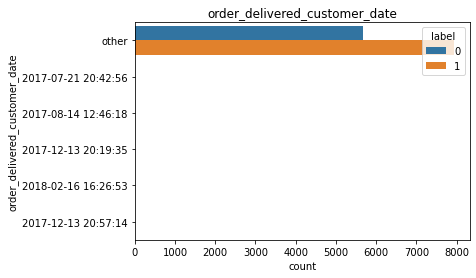

jumlah kategori unik dalam fitur order_delivered_customer_date: 11582
2018-02-16 16:26:53    12
2017-07-21 20:42:56    11
2017-12-13 20:19:35     9
2017-12-13 20:57:14     8
2018-01-16 20:58:52     7
                       ..
2018-04-17 13:12:01     1
2017-07-28 21:07:30     1
2018-06-21 16:50:46     1
2017-07-17 16:38:39     1
2018-05-15 13:56:46     1
Name: order_delivered_customer_date, Length: 11582, dtype: int64
************************************************************
10 order_estimated_delivery_date


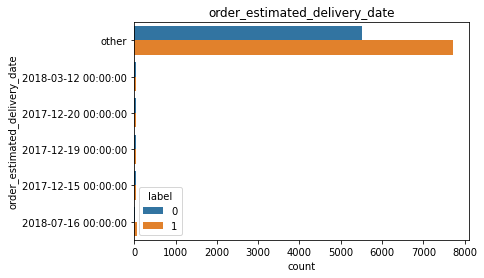

jumlah kategori unik dalam fitur order_estimated_delivery_date: 416
2017-12-15 00:00:00    92
2017-12-19 00:00:00    85
2018-03-12 00:00:00    80
2018-07-16 00:00:00    79
2018-05-29 00:00:00    75
                       ..
2016-11-25 00:00:00     1
2016-12-19 00:00:00     1
2017-02-16 00:00:00     1
2018-10-04 00:00:00     1
2016-12-06 00:00:00     1
Name: order_estimated_delivery_date, Length: 416, dtype: int64
************************************************************
11 shipping_limit_date


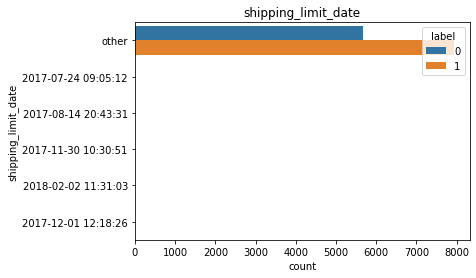

jumlah kategori unik dalam fitur shipping_limit_date: 11529
2018-02-02 11:31:03    12
2017-07-24 09:05:12    11
2017-11-30 10:30:51     9
2017-12-01 12:18:26     8
2018-01-12 19:27:42     7
                       ..
2018-05-21 03:56:04     1
2017-05-18 02:55:23     1
2018-06-11 08:22:46     1
2018-04-24 21:51:00     1
2018-05-10 19:55:14     1
Name: shipping_limit_date, Length: 11529, dtype: int64
************************************************************
12 payment_type


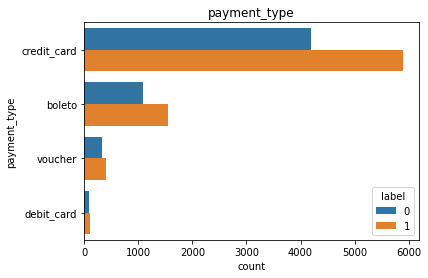

jumlah kategori unik dalam fitur payment_type: 5
credit_card    10095
boleto          2633
voucher          739
debit_card       177
Name: payment_type, dtype: int64
************************************************************
13 product_category_name


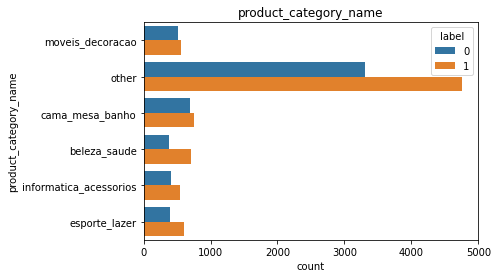

jumlah kategori unik dalam fitur product_category_name: 71
cama_mesa_banho                                  1455
beleza_saude                                     1086
moveis_decoracao                                 1077
esporte_lazer                                    1003
informatica_acessorios                            954
                                                 ... 
moveis_colchao_e_estofado                           4
fashion_roupa_feminina                              3
artigos_de_festas                                   3
portateis_cozinha_e_preparadores_de_alimentos       1
pc_gamer                                            1
Name: product_category_name, Length: 70, dtype: int64
************************************************************
14 seller_city


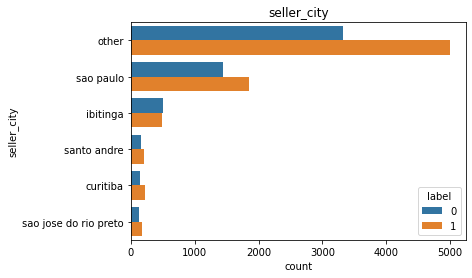

jumlah kategori unik dalam fitur seller_city: 415
sao paulo                3293
ibitinga                 1002
curitiba                  368
santo andre               360
sao jose do rio preto     307
                         ... 
balenario camboriu          1
itapeva                     1
descalvado                  1
tres de maio                1
vassouras                   1
Name: seller_city, Length: 415, dtype: int64
************************************************************
15 seller_state


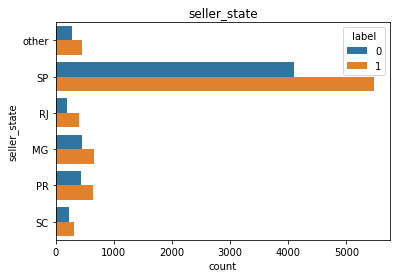

jumlah kategori unik dalam fitur seller_state: 20
SP    9586
MG    1106
PR    1082
RJ     599
SC     542
RS     280
DF     133
GO      72
BA      65
PE      49
MA      46
ES      34
MT      23
MS       7
CE       7
PB       6
RN       4
SE       2
PA       1
PI       1
Name: seller_state, dtype: int64
************************************************************
16 product_category_name_english


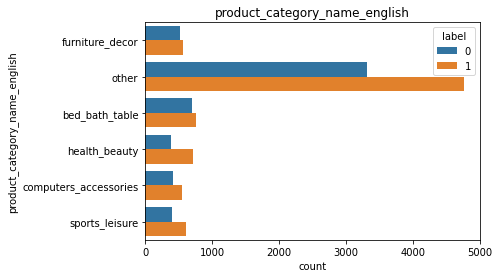

jumlah kategori unik dalam fitur product_category_name_english: 69
bed_bath_table                       1455
health_beauty                        1086
furniture_decor                      1077
sports_leisure                       1003
computers_accessories                 954
                                     ... 
la_cuisine                              4
arts_and_craftmanship                   4
furniture_mattress_and_upholstery       4
party_supplies                          3
fashio_female_clothing                  3
Name: product_category_name_english, Length: 68, dtype: int64
************************************************************


In [17]:
# EDA univariat untuk fitur kategorik
for index, column in enumerate(df_train_obj_copy.columns):
    print(index + 1, column)
    sns.countplot(data = df_train_partially_dropped, y = column, hue='label')
    plt.title(column)
    plt.show()
    print(f"jumlah kategori unik dalam fitur {column}: {len(df_train[column].unique())}")
    print(df_train[column].value_counts())
    print("***" * 20)

In [18]:
label_proportion = df_train_partially_dropped.groupby(by='label', axis=0).count()/len(df_train_partially_dropped)

In [19]:
label_proportion[df_train_obj.columns]

,customer_city,customer_state,geolocation_city,geolocation_state,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,shipping_limit_date,payment_type,product_category_name,seller_city,seller_state,product_category_name_english
label,,,,,,,,,,,,,,,,
0,0.417442,0.417442,0.417442,0.417442,0.417442,0.417442,0.417442,0.417442,0.417442,0.417442,0.417442,0.417369,0.417442,0.417442,0.417442,0.417442
1,0.582558,0.582558,0.582558,0.582558,0.582558,0.582558,0.582558,0.582558,0.582558,0.582558,0.582558,0.582558,0.582558,0.582558,0.582558,0.582558


In [20]:
ct = pd.crosstab(index=df_train_partially_dropped['seller_city'], columns=df_train_partially_dropped['label'], normalize='index')
print(ct)

label                         0         1
seller_city                              
curitiba               0.399457  0.600543
ibitinga               0.503992  0.496008
other                  0.399880  0.600120
santo andre            0.430556  0.569444
sao jose do rio preto  0.400651  0.599349
sao paulo              0.437595  0.562405


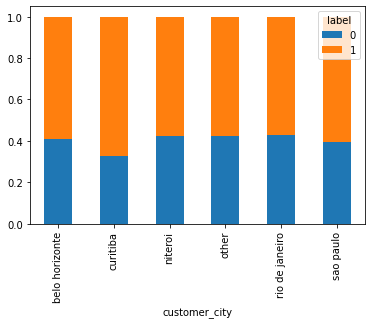

label                  0         1
customer_city                     
belo horizonte  0.408309  0.591691
curitiba        0.329060  0.670940
niteroi         0.422018  0.577982
other           0.421024  0.578976
rio de janeiro  0.427739  0.572261
sao paulo       0.396635  0.603365


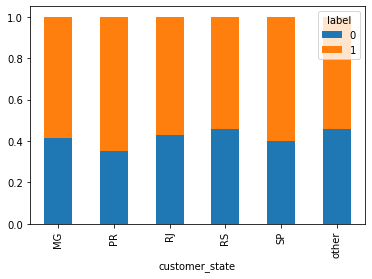

label                  0         1
customer_state                    
MG              0.416163  0.583837
PR              0.351885  0.648115
RJ              0.428676  0.571324
RS              0.458278  0.541722
SP              0.398398  0.601602
other           0.458811  0.541189


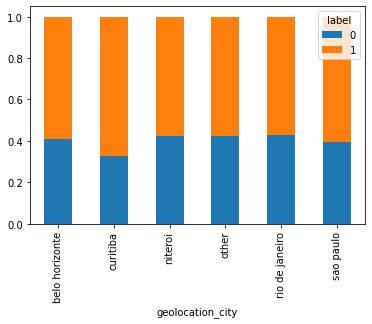

label                    0         1
geolocation_city                    
belo horizonte    0.408309  0.591691
curitiba          0.329060  0.670940
niteroi           0.421333  0.578667
other             0.421075  0.578925
rio de janeiro    0.427988  0.572012
sao paulo         0.392193  0.607807


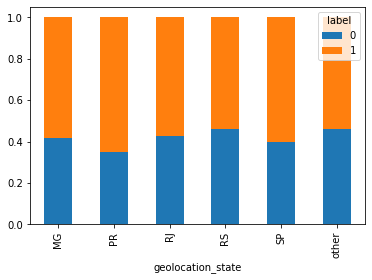

label                     0         1
geolocation_state                    
MG                 0.416163  0.583837
PR                 0.351885  0.648115
RJ                 0.428676  0.571324
RS                 0.458278  0.541722
SP                 0.398398  0.601602
other              0.458811  0.541189


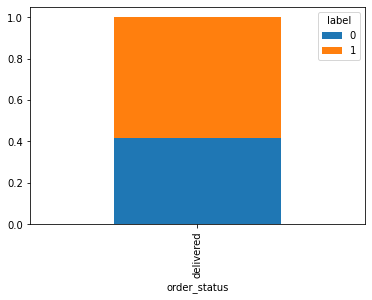

label                0         1
order_status                    
delivered     0.417442  0.582558


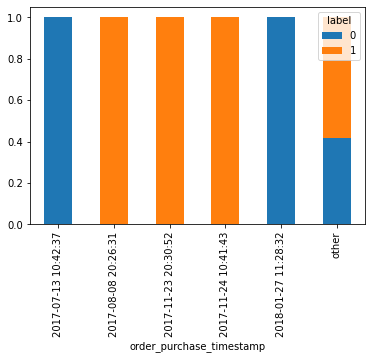

label                            0         1
order_purchase_timestamp                    
2017-07-13 10:42:37       1.000000  0.000000
2017-08-08 20:26:31       0.000000  1.000000
2017-11-23 20:30:52       0.000000  1.000000
2017-11-24 10:41:43       0.000000  1.000000
2018-01-27 11:28:32       1.000000  0.000000
other                     0.417194  0.582806


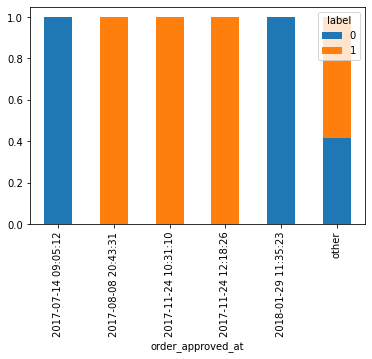

label                       0         1
order_approved_at                      
2017-07-14 09:05:12  1.000000  0.000000
2017-08-08 20:43:31  0.000000  1.000000
2017-11-24 10:31:10  0.000000  1.000000
2017-11-24 12:18:26  0.000000  1.000000
2018-01-29 11:35:23  1.000000  0.000000
other                0.417194  0.582806


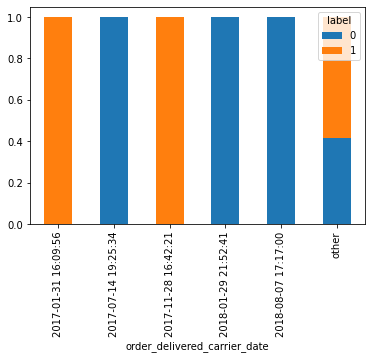

label                                0         1
order_delivered_carrier_date                    
2017-01-31 16:09:56           0.000000  1.000000
2017-07-14 19:25:34           1.000000  0.000000
2017-11-28 16:42:21           0.000000  1.000000
2018-01-29 21:52:41           1.000000  0.000000
2018-08-07 17:17:00           1.000000  0.000000
other                         0.416636  0.583364


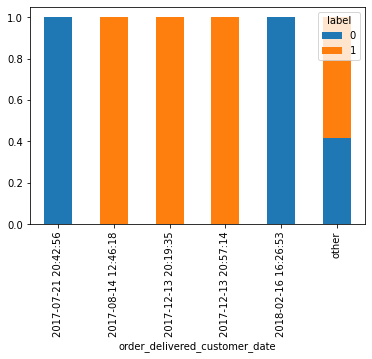

label                                 0         1
order_delivered_customer_date                    
2017-07-21 20:42:56            1.000000  0.000000
2017-08-14 12:46:18            0.000000  1.000000
2017-12-13 20:19:35            0.000000  1.000000
2017-12-13 20:57:14            0.000000  1.000000
2018-02-16 16:26:53            1.000000  0.000000
other                          0.417194  0.582806


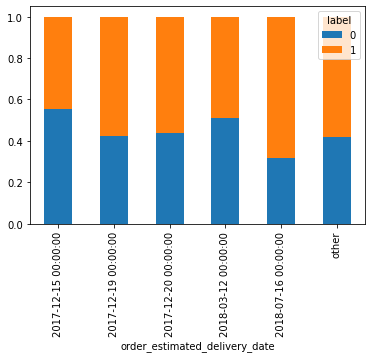

label                                 0         1
order_estimated_delivery_date                    
2017-12-15 00:00:00            0.554348  0.445652
2017-12-19 00:00:00            0.423529  0.576471
2017-12-20 00:00:00            0.440000  0.560000
2018-03-12 00:00:00            0.512500  0.487500
2018-07-16 00:00:00            0.316456  0.683544
other                          0.416352  0.583648


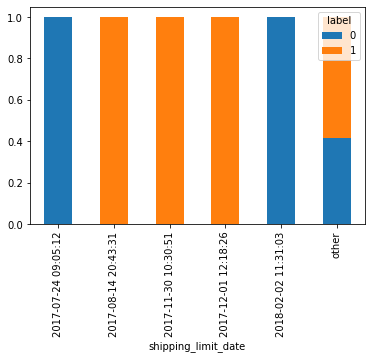

label                       0         1
shipping_limit_date                    
2017-07-24 09:05:12  1.000000  0.000000
2017-08-14 20:43:31  0.000000  1.000000
2017-11-30 10:30:51  0.000000  1.000000
2017-12-01 12:18:26  0.000000  1.000000
2018-02-02 11:31:03  1.000000  0.000000
other                0.417194  0.582806


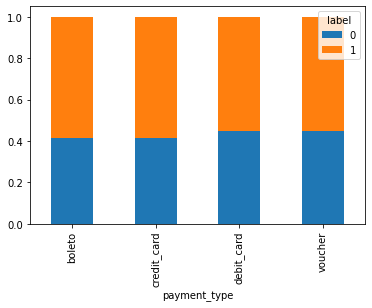

label                0         1
payment_type                    
boleto        0.412837  0.587163
credit_card   0.415849  0.584151
debit_card    0.446328  0.553672
voucher       0.447903  0.552097


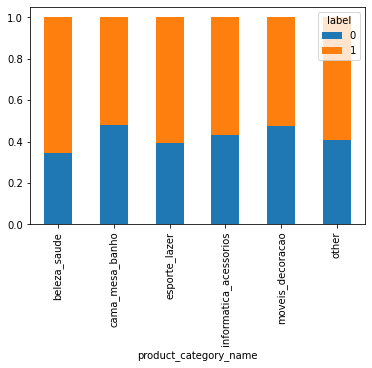

label                          0         1
product_category_name                     
beleza_saude            0.347145  0.652855
cama_mesa_banho         0.477663  0.522337
esporte_lazer           0.391825  0.608175
informatica_acessorios  0.431866  0.568134
moveis_decoracao        0.476323  0.523677
other                   0.409665  0.590335


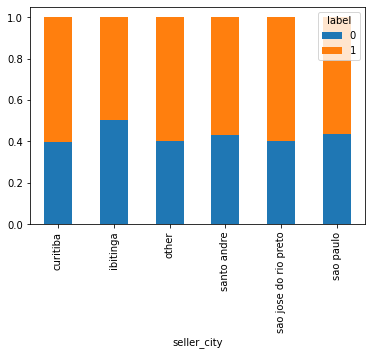

label                         0         1
seller_city                              
curitiba               0.399457  0.600543
ibitinga               0.503992  0.496008
other                  0.399880  0.600120
santo andre            0.430556  0.569444
sao jose do rio preto  0.400651  0.599349
sao paulo              0.437595  0.562405


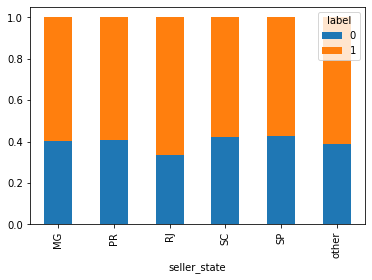

label                0         1
seller_state                    
MG            0.403255  0.596745
PR            0.405730  0.594270
RJ            0.333890  0.666110
SC            0.420664  0.579336
SP            0.427811  0.572189
other         0.386301  0.613699


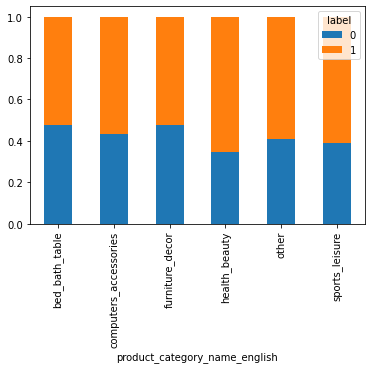

label                                 0         1
product_category_name_english                    
bed_bath_table                 0.477663  0.522337
computers_accessories          0.431866  0.568134
furniture_decor                0.476323  0.523677
health_beauty                  0.347145  0.652855
other                          0.409665  0.590335
sports_leisure                 0.391825  0.608175


In [21]:
for col in df_train_obj.columns:
    ct = pd.crosstab(index=df_train_partially_dropped[col], columns=df_train_partially_dropped['label'], normalize='index')
    ct.plot(kind='bar', stacked=True)
    plt.show()
    print(ct)

In [22]:
df_train_partially_dropped.to_csv('rating_new.csv')

In [25]:
df_train_obj.head()

,customer_city,customer_state,geolocation_city,geolocation_state,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,shipping_limit_date,payment_type,product_category_name,seller_city,seller_state,product_category_name_english
0,rio de janeiro,RJ,rio de janeiro,RJ,delivered,2017-03-20 21:55:02,2017-03-20 21:55:02,2017-03-23 12:22:48,2017-03-30 13:57:07,2017-04-12 00:00:00,2017-03-26 21:55:02,credit_card,moveis_decoracao,brasilia,DF,furniture_decor
1,rio de janeiro,RJ,rio de janeiro,RJ,delivered,2018-05-10 11:23:03,2018-05-10 11:51:37,2018-05-16 15:29:00,2018-05-22 19:03:49,2018-06-14 00:00:00,2018-05-16 11:51:37,credit_card,relogios_presentes,ribeirao preto,SP,watches_gifts
2,rio de janeiro,RJ,rio de janeiro,RJ,delivered,2018-03-19 12:14:50,2018-03-19 12:30:39,2018-03-20 17:58:50,2018-04-02 22:36:51,2018-04-19 00:00:00,2018-03-23 12:30:39,credit_card,cool_stuff,sao paulo,SP,cool_stuff
3,rio de janeiro,RJ,rio de janeiro,RJ,delivered,2017-07-20 12:00:22,2017-07-20 12:10:08,2017-07-24 16:24:55,2017-07-31 19:03:53,2017-08-21 00:00:00,2017-08-03 12:10:08,credit_card,alimentos_bebidas,monteiro lobato,SP,food_drink
4,petrolandia,PE,petrolandia,PE,delivered,2018-01-02 10:32:22,2018-01-03 04:33:26,2018-01-08 19:42:58,2018-01-22 22:19:07,2018-02-14 00:00:00,2018-01-12 04:33:26,boleto,cool_stuff,jacarei,SP,cool_stuff


In [44]:
columns = ((idx, col) for idx, col in enumerate(df_train_obj.columns))
for col in columns:
    print(col)

(0, 'customer_city')
(1, 'customer_state')
(2, 'geolocation_city')
(3, 'geolocation_state')
(4, 'order_status')
(5, 'order_purchase_timestamp')
(6, 'order_approved_at')
(7, 'order_delivered_carrier_date')
(8, 'order_delivered_customer_date')
(9, 'order_estimated_delivery_date')
(10, 'shipping_limit_date')
(11, 'payment_type')
(12, 'product_category_name')
(13, 'seller_city')
(14, 'seller_state')
(15, 'product_category_name_english')


In [56]:
df_train_obj.columns[5:11]

Index(['order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'shipping_limit_date'],
      dtype='object')

In [87]:
for col in df_train_obj.columns[5:11]:
    df_train_obj[col] = pd.to_datetime(df_train_obj[col], unit='D')

In [88]:
df_train_obj.head()

,customer_city,customer_state,geolocation_city,geolocation_state,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,shipping_limit_date,payment_type,product_category_name,seller_city,seller_state,product_category_name_english
0,rio de janeiro,RJ,rio de janeiro,RJ,delivered,2017-03-20 21:55:02,2017-03-20 21:55:02,2017-03-23 12:22:48,2017-03-30 13:57:07,2017-04-12,2017-03-26 21:55:02,credit_card,moveis_decoracao,brasilia,DF,furniture_decor
1,rio de janeiro,RJ,rio de janeiro,RJ,delivered,2018-05-10 11:23:03,2018-05-10 11:51:37,2018-05-16 15:29:00,2018-05-22 19:03:49,2018-06-14,2018-05-16 11:51:37,credit_card,relogios_presentes,ribeirao preto,SP,watches_gifts
2,rio de janeiro,RJ,rio de janeiro,RJ,delivered,2018-03-19 12:14:50,2018-03-19 12:30:39,2018-03-20 17:58:50,2018-04-02 22:36:51,2018-04-19,2018-03-23 12:30:39,credit_card,cool_stuff,sao paulo,SP,cool_stuff
3,rio de janeiro,RJ,rio de janeiro,RJ,delivered,2017-07-20 12:00:22,2017-07-20 12:10:08,2017-07-24 16:24:55,2017-07-31 19:03:53,2017-08-21,2017-08-03 12:10:08,credit_card,alimentos_bebidas,monteiro lobato,SP,food_drink
4,petrolandia,PE,petrolandia,PE,delivered,2018-01-02 10:32:22,2018-01-03 04:33:26,2018-01-08 19:42:58,2018-01-22 22:19:07,2018-02-14,2018-01-12 04:33:26,boleto,cool_stuff,jacarei,SP,cool_stuff


In [107]:
df_train_obj['order_delivered_customer_date'].iloc[0]

Timestamp('2017-03-30 13:57:07')

In [103]:
df_train_num['delivered_est_difference'], df_train_num['delivered_purchase_difference'] = [df_train_obj.iloc[:, 9].days - 
df_train_obj.iloc[:, 8].days, 
df_train_obj.iloc[:, 8].days - df_train_obj.iloc[:, 5].days]
df_train_num.head()

AttributeError: 'Series' object has no attribute 'days'

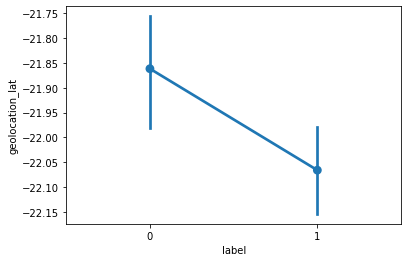

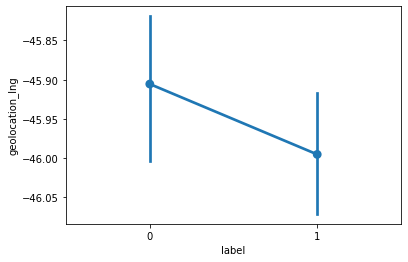

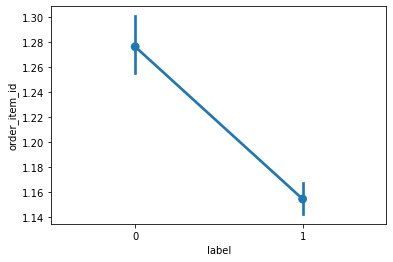

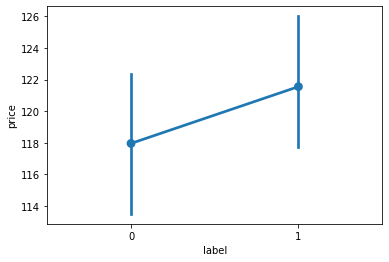

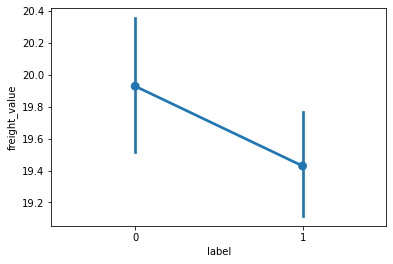

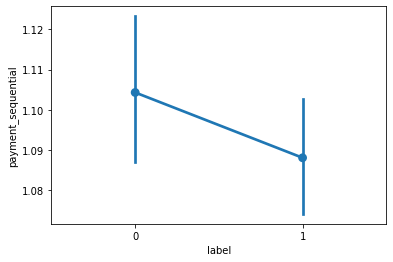

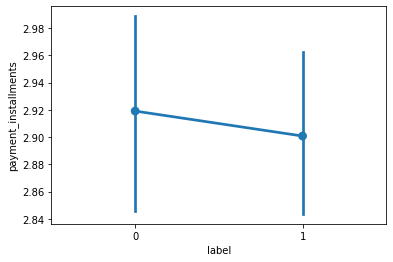

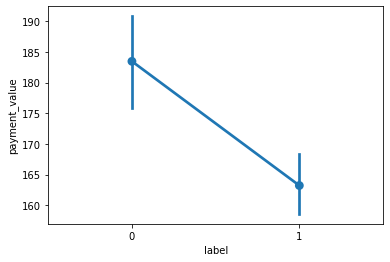

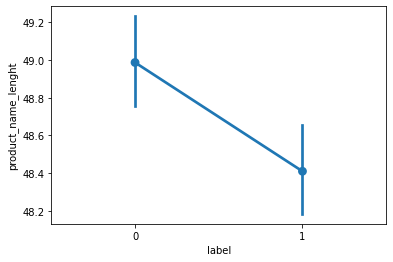

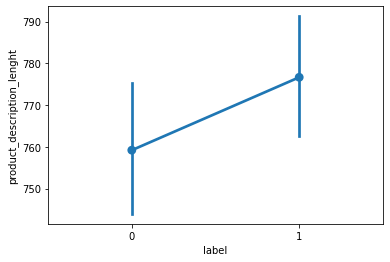

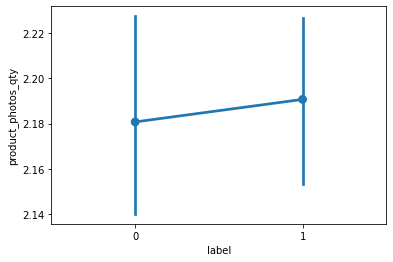

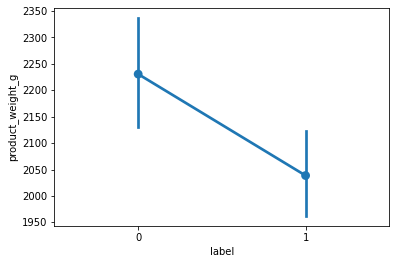

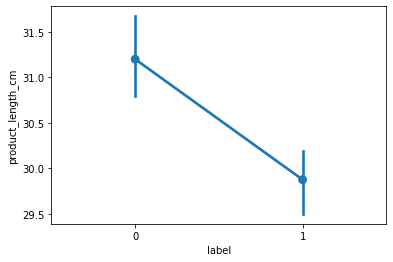

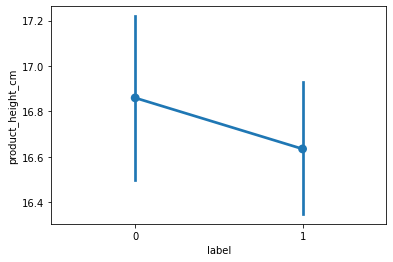

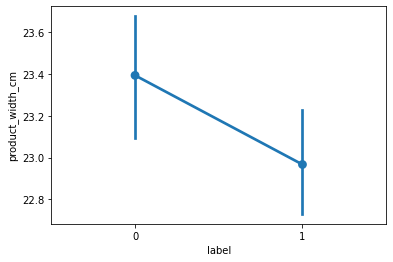

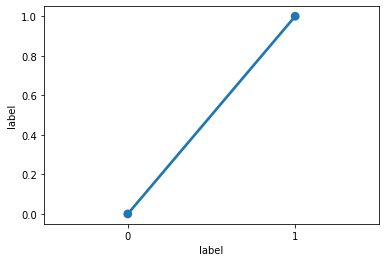

KeyboardInterrupt: 

In [90]:
for col in df_train_num.columns:
    sns.pointplot(data=df_train_num, x='label', y=col)
    plt.show()

In [96]:
df_train_num['delivered_est_difference'] = pd.to_numeric(df_train_num['delivered_est_difference'])

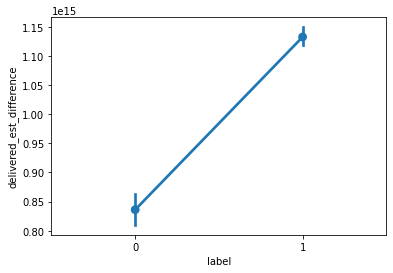

In [98]:
sns.pointplot(data=df_train_num, x='label', y='delivered_est_difference')
plt.show()

In [100]:
df_train_num['delivered_purchase_difference'] = pd.to_numeric(df_train_num['delivered_purchase_difference'])

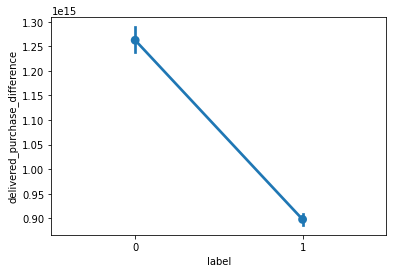

In [101]:
sns.pointplot(data=df_train_num, x='label', y='delivered_purchase_difference')
plt.show()